# AI project – Zucchetti Spa dataset

## Preprocessing

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

UNKNOWN = 'unknown'
SAMPLE = 10

In [81]:
# Read in the data from the CSV file into a a dataframe 
df = pd.read_csv('coded_log.csv', sep=";",names=['userId', '1?', 'date','eventType','application','2?','ip','3?','4?','5?'])

In [82]:
# Visualize a snippet of the data frame df
df.sample(SAMPLE)

userId         1?                     date  eventType application  \
250724    8949  988904133  2021-05-25 17:38:17.000          1         HRW   
820167   32969  839537034  2021-06-16 16:38:30.000          1         ERM   
762606   31360  592892140  2021-06-10 16:38:43.000          1         HR1   
521670   22049  972031392  2021-04-30 08:06:05.000          1         HRW   
573976   23864  174342317  2021-06-14 12:19:22.000          1         ERM   
518278   21961  901641516  2020-12-15 17:08:54.000          1         ERM   
175549    3387  214910864  2021-04-15 08:47:38.000          1         ERM   
432030   18750  495987110  2021-04-21 08:56:33.000          1         HRW   
169711    3278  326116305  2021-04-23 09:00:26.000          1         HRC   
318690   13214  161144535  2021-05-27 16:00:47.000          3         ERM   

              2?        ip          3?          4?          5?  
250724       NaN       NaN  001         ogpcsophob  p6fi0cjpri  
820167  erm3zs02  ip_15354  001         qzvvsxofdj  twlzpb6ljk  
762606       NaN       NaN  006                     xu78jyb2eh  
521670       NaN       NaN  001         hneahumhlp  ey9qlhs538  
573976  erm3zs02  ip_26592  001         vplssqxhyx  lz7ygbzcc7  
518278  erm3zs02      ip_3  001         rhhlesgclz  i985nasrzd  
175549  erm3zs02   ip_1469  001         jpddvtyubv  k5hxod564w  
432030       NaN       NaN  001         rzvgctjctg  od0gevg8ip  
169711       NaN       NaN  001                     xvijp6e3zy  
318690  erm3zs02   ip_5477  006         sslimpyajb  caec48ja0h

In [83]:
#remove unkown coloums
df_ = df.drop(columns=['1?','2?','3?','4?','5?'])

df_.sample(SAMPLE)

userId                     date  eventType application        ip
218820    4199  2021-03-29 11:56:43.000          1         ERM   ip_1360
219116    4207  2021-05-14 09:28:12.000          3         HRW       NaN
683043   27806  2021-04-02 08:45:29.000          1         HRW       NaN
756508   31173  2021-06-01 16:19:31.000          1         ERM  ip_15354
316996   13101  2021-04-12 17:11:36.000          1         HR1       NaN
137026    2686  2021-03-31 13:12:13.000          3         HRW       NaN
471952   20081  2021-04-26 11:01:01.000          1         GTL       NaN
261861    9731  2021-06-28 15:39:06.000          1         HRW       NaN
498006   20577  2021-05-24 09:08:40.000          1         ERM  ip_19552
309950   12612  2021-01-15 12:51:32.000          1         ERM  ip_11855

In [84]:
#cleaning row data

print('number of null entries:')
df_.isnull().sum()

number of null entries:


userId              0
date                0
eventType           0
application         0
ip             339741
dtype: int64

In [85]:
df_['ip'].fillna(UNKNOWN,inplace=True)

df_.sample(SAMPLE)

userId                     date  eventType application        ip
388085   16371  2021-05-20 17:25:48.000          1         ERM      ip_3
649602   26517  2021-04-06 08:12:03.000          1         ERM  ip_27361
743453   30723  2021-04-26 15:10:51.000          1         ERM   ip_4015
583772   24367  2021-05-04 13:35:08.000          1         ERM    ip_855
137883    2699  2021-04-09 08:40:33.000          3         HRW   unknown
177165    3423  2021-04-29 19:05:09.000          1         HRW   unknown
507939   21442  2021-06-15 19:21:52.000          2         ERM  ip_20973
381341   15031  2021-03-30 09:25:53.000          1         HRW   unknown
9078         1  2021-06-01 03:46:24.000          1         HRW   unknown
122922    2436  2021-06-18 15:50:56.000          1         ERM   ip_1466

### Data cleaning

In [86]:
df_['date'] = pd.to_datetime(df_['date'], format="%Y-%m-%d %H:%M:%S.%f")

# sorting by date and userId
df_.sort_values(by=["userId", "date"],ascending=(True, True),inplace=True)

#check data consistency: delete rows containing non-valid event code
df_ = df_[(df_.eventType >= 1) & (df_.eventType <= 3)]

#check data rendundancy
duplicates = df_.duplicated().sum()
if(duplicates > 0):
    print(f'Duplicates number {duplicates} on {len(df_.index)}')
    df_.drop_duplicates(inplace = True)
    print(f'New size:{len(df_.index)}')
df_

Duplicates number 3432 on 849552
New size:846120


userId                date  eventType application        ip
9162         1 2021-03-22 20:03:59          1         HRW   unknown
5482         1 2021-03-22 20:18:59          1         HRW   unknown
1872         1 2021-03-22 20:33:59          1         HRW   unknown
8919         1 2021-03-22 20:48:59          1         HRW   unknown
3704         1 2021-03-22 21:03:59          1         HRW   unknown
...        ...                 ...        ...         ...       ...
849547   33952 2021-06-23 08:45:56          1         ERM    ip_780
849548   33953 2021-06-23 08:07:16          1         ERM  ip_15260
849549   33954 2021-06-23 10:18:33          1         ERM  ip_15260
849550   33961 2021-06-24 08:58:23          1         ERM    ip_124
849551   33963 2021-06-28 11:17:45          1         ERM    ip_128

[846120 rows x 5 columns]

In [87]:
# counting unique values
userIdNumber = len(pd.unique(df_['userId']))

print(f'**** Within the dataset there are {userIdNumber} users ****')

**** Within the dataset there are 18080 users ****


In [88]:
print('##########################################')
print(f"{df_.groupby('eventType').eventType.count()}")
print('##########################################')

##########################################
eventType
1    628356
2     92058
3    125706
Name: eventType, dtype: int64
##########################################


### Utility functions

#### Constants

In [89]:
#working hours boundary
START_WORKING = 8
END_WORKING = 19
#time boundaries for series construction
AT_LEAST_ONE_DAY = 24 * 3600 * 1000 # 24 h
MAX_DELAY_ERRORS = 5 * 60 * 1000 # 5min
MAX_DELAY_SUCCESS = 5 * 60 * 1000 # 5min
#attempts boundaries
MAX_ATTEMPTS = 3
MAX_TIME_BOT = 5000 # maximum time for a bot to insert a password. We consider users emulation and special chars

#events type
FAILED_LOGIN = 2
SUCCESSFUL_LOGIN = 1
LOGOUT = 3

#weights
WORKINGTIME_WORKINGDAY = 0.25
NOT_WORKINGTIME_WEEKDAY = 0.35
WORKINGTIME_NOT_WORKINGDAY = 0.45
NOT_WORKINGTIME_NOT_WEEKDAY = 0.55

#### Weigthin function

In [210]:


def suspicious(serie):
    """
    serie[0] = "userId"
    serie[1] = "avgTime"
    serie[2] = "failedAttempts"
    serie[3] = "hasSuccess"
    serie[4] = "application"
    serie[5] = "workingTime"
    serie[6] = "day"
    serie[7] = "ipAmount"
    serie[8] = "suspicious"
    """
    
    # weights
    timeW = timeWeight(serie[6], serie[5])
    ipAmount =1 - (1/(serie[7]) if serie[7] > 1 else 0.6) #one ip used case 
    serieW = serieWeight(serie[1], serie[2], serie[3])
    failedAttempts = 1- (1/serie[2])
    return graham([timeW,ipAmount,serieW[0],serieW[1]])#((5 * timeW) + (25 * ipAmount) + (70 * serieW))/100 # percentage

#graham formula to avoid underflow 
def graham(weights:list):
    mu = 0
    for w in weights:
        print(f"w {w}")
        mu += np.log(1 - w) - np.log(w)
    return 1/(1+np.e**mu)

def timeWeight(day, isWorkingTime):
    weekDay = day in range(1,6)
    if isWorkingTime and weekDay:
        w = WORKINGTIME_WORKINGDAY
    elif not isWorkingTime and weekDay:
        w = NOT_WORKINGTIME_WEEKDAY
    elif isWorkingTime and not weekDay:
        w = WORKINGTIME_NOT_WORKINGDAY
    elif not isWorkingTime and not weekDay:
        w = NOT_WORKINGTIME_NOT_WEEKDAY
    return w


def serieWeight(avgTime, failedAttempts, hasSuccess):
    w_attempts = 0
    if hasSuccess:
        if failedAttempts <= MAX_ATTEMPTS:
            w_attempts = 0.1
        else:
            w_attempts = 0.7
    else:
        if failedAttempts <= MAX_ATTEMPTS:
            w_attempts = 0.5
        elif failedAttempts <= 2 * MAX_ATTEMPTS:
            w_attempts = 0.7
        else:
            w_attempts = 0.9
            
    w_avgtime = avgTimeWight(avgTime,failedAttempts)
    return (w_avgtime,w_attempts)

def avgTimeWight(avgTime,failedAttempts):
    w = 0
    if avgTime < MAX_TIME_BOT:
        w = 0.99
    elif MAX_TIME_BOT <= avgTime <= MAX_DELAY_ERRORS - MAX_TIME_BOT:
        w = 0.85
    else: 
        w = 0.75
    return w


## Dataframe login construction

#### Lambda functions

In [91]:
# deterimine if the log was dueing working hours
isWorkingTime = lambda x: 1 if (x.isoweekday() in range(1,6) and x.to_pydatetime().hour >= START_WORKING and x.to_pydatetime().hour <= END_WORKING) else 0

# toDay: convert a stirng representing a date into a number 
#    1 --> Monday
#    2 --> Tuesday
#    ...
#    7 --> Sunday
toDay = lambda x: x.isoweekday() 

In [92]:
#setting up the 1st datase
df_logins = pd.DataFrame(columns=['userId', 'date', 'day', 'workingTime', 'eventType', 'application',"ip"])
df_logins['userId'] = df_['userId']
df_logins['date'] = df_["date"]
df_logins['day'] = df_logins['date'].apply(toDay)
df_logins['workingTime'] = df_logins['date'].apply(isWorkingTime)
df_logins['eventType'] = df_['eventType']
df_logins['application'] = df_['application']
df_logins['ip'] = df_['ip']

#df_logins.drop(columns=['date'], inplace=True)
df_logins.head(SAMPLE)

userId                date  day  workingTime  eventType application  \
9162       1 2021-03-22 20:03:59    1            0          1         HRW   
5482       1 2021-03-22 20:18:59    1            0          1         HRW   
1872       1 2021-03-22 20:33:59    1            0          1         HRW   
8919       1 2021-03-22 20:48:59    1            0          1         HRW   
3704       1 2021-03-22 21:03:59    1            0          1         HRW   
4120       1 2021-03-22 21:18:59    1            0          1         HRW   
9001       1 2021-03-22 21:33:59    1            0          1         HRW   
6135       1 2021-03-22 21:48:59    1            0          1         HRW   
8505       1 2021-03-22 22:03:59    1            0          1         HRW   
4633       1 2021-03-22 22:18:59    1            0          1         HRW   

           ip  
9162  unknown  
5482  unknown  
1872  unknown  
8919  unknown  
3704  unknown  
4120  unknown  
9001  unknown  
6135  unknown  
8505  unknown  
4633  unknown

#### Data plotting

Every log between Friday and Sunday occurred outside working time 

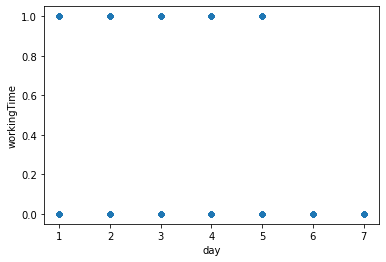

In [93]:
df_logins.plot(x = 'day', y = 'workingTime', kind = 'scatter')
plt.show()

Each kind of event is happend in both working time and non-working time

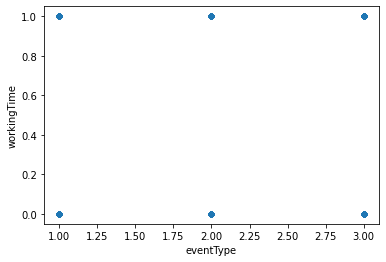

In [94]:
df_logins.plot(x = 'eventType', y = 'workingTime', kind = 'scatter')
plt.show()

Failed logins attempts occurred only for application ERM, HRW and TM3 

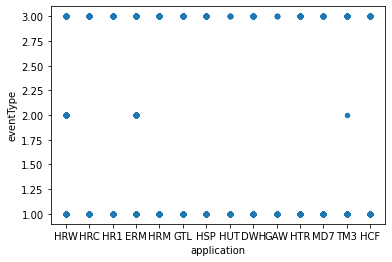

In [95]:
df_logins.plot(x = 'application', y = 'eventType', kind = 'scatter')
plt.show()

In [96]:
#remove attemps regarding applications with no errors associated
df_logins.drop(df_logins[df_logins["application"].isin(["ERM","HRW","TM3"]) == False].index ,inplace=True)
np.unique(df_logins["application"])

array(['ERM', 'HRW', 'TM3'], dtype=object)

### Series dataframe construction

In [97]:
# group by the userId
df_groupbyUserId = df_logins.groupby('userId')

In [98]:
# Retrieving users id
users_id = []
for key, value in df_groupbyUserId:
    users_id.append(key)

# Take userId having 0 or 1 login errors
userList = []

for i in users_id:
    user_group = df_groupbyUserId.get_group(i)
    ctr = user_group[user_group["eventType"] == FAILED_LOGIN].count()
    if ctr["eventType"] <= 1:
        userList.append(i)

In [99]:
# remove from the dataset all the users in userList
df_logins.drop(df_logins[df_logins["userId"].isin(userList)].index,inplace=True)
#df_logins = df_logins[df_logins["userId"].isin(userList) == False]
df_logins

userId                date  day  workingTime  eventType application  \
9680        10 2020-06-15 14:19:45    1            1          2         ERM   
9681        10 2020-11-04 10:56:10    3            1          2         ERM   
9684        17 2021-02-02 09:04:05    2            1          2         ERM   
9685        17 2021-02-02 09:04:05    2            1          1         ERM   
9692        17 2021-03-04 10:30:15    4            1          2         ERM   
...        ...                 ...  ...          ...        ...         ...   
849533   33949 2021-06-28 15:11:01    1            1          2         ERM   
849532   33949 2021-06-28 15:17:00    1            1          2         ERM   
849531   33949 2021-06-28 15:17:22    1            1          2         ERM   
849535   33949 2021-06-28 15:20:47    1            1          2         ERM   
849528   33949 2021-06-28 15:23:33    1            1          2         ERM   

             ip  
9680       ip_2  
9681       ip_3  
9684       ip_4  
9685       ip_4  
9692       ip_4  
...         ...  
849533  ip_1285  
849532  ip_1285  
849531  ip_1285  
849535  ip_1285  
849528  ip_1285  

[568194 rows x 7 columns]

In [100]:
df_groupbyUserId = df_logins.groupby('userId')

In [101]:
# list of remaining userId 
users_id = [user for user in users_id if (user not in userList)]

userList.clear()

# getting all users having at least two login errors
for i in users_id:
    user_group = df_groupbyUserId.get_group(i)
    rowsNumber = len(user_group.index)
    j = 0
    while j < rowsNumber - 1:
        if user_group.iloc[j]["eventType"] == FAILED_LOGIN:
            k = j+1            
            while k < rowsNumber and user_group.iloc[k]["eventType"] != FAILED_LOGIN:
                k += 1
            if k == 1 or k != rowsNumber: # after a login error the user have other login errors (1 or more)
                userList.append(i)
                break
            j = k
        else:
            j += 1

In [102]:
# remove all users having only successful attempts after an error
#df_logins = df_logins[df_logins["userId"].isin(userList)]
df_logins.drop(df_logins[df_logins["userId"].isin(userList) == False].index,inplace=True)
df_logins.sample(SAMPLE)

userId                date  day  workingTime  eventType application  \
793380   32227 2021-04-01 13:01:12    4            1          3         ERM   
122122    2424 2021-04-28 11:44:51    3            1          1         ERM   
69958     1516 2021-04-27 14:06:42    2            1          3         HRW   
234865    6230 2021-03-16 11:48:17    2            1          2         ERM   
46067     1048 2021-05-03 12:11:21    1            1          1         HRW   
511231   21509 2021-06-10 08:11:20    4            1          1         ERM   
269811    9896 2021-06-04 12:00:21    5            1          3         HRW   
508406   21454 2021-06-21 12:17:25    1            1          1         ERM   
432310   18756 2021-03-19 10:35:50    5            1          1         HRW   
703465   28458 2021-06-11 08:05:02    5            1          1         ERM   

              ip  
793380    ip_126  
122122   ip_1469  
69958    unknown  
234865   ip_6423  
46067    unknown  
511231    ip_916  
269811   unknown  
508406    ip_916  
432310   unknown  
703465  ip_23154

In [104]:
df_groupbyUserId = df_logins.groupby('userId')
df_groupbyUserId.count()

date  day  workingTime  eventType  application  ip
userId                                                    
10         2    2            2          2            2   2
17        18   18           18         18           18  18
18         4    4            4          4            4   4
21        23   23           23         23           23  23
24        24   24           24         24           24  24
...      ...  ...          ...        ...          ...  ..
33916     14   14           14         14           14  14
33920     11   11           11         11           11  11
33928     23   23           23         23           23  23
33934     11   11           11         11           11  11
33949     20   20           20         20           20  20

[10865 rows x 6 columns]

In [105]:
# list of remaining userId
users_id = [user for user in users_id if (user in userList)]

userList = []

# take all users who have at least 2 login errors in 24h
for i in users_id:
    user_group = df_groupbyUserId.get_group(i)
    rowsNumber = len(user_group.index)
    j = 0
    while j < rowsNumber - 1:
        if user_group.iloc[j]["eventType"] == FAILED_LOGIN:
            k = j+1          
            while k < rowsNumber and user_group.iloc[k]["eventType"] != FAILED_LOGIN:
                k += 1
            if k == 1 or k != rowsNumber:
                delta = int((user_group.iloc[k]["date"] - user_group.iloc[j]["date"]).total_seconds()) * 1000
                if delta < AT_LEAST_ONE_DAY:
                    userList.append(i) # save userId
                    break
            j = k
        else:
            j += 1


In [117]:
# remove all users who do not have 2 login errors in 24h
#df_logins = df_logins[df_logins["userId"].isin(userList)]
df_logins.drop(df_logins[df_logins["userId"].isin(userList) == False].index,inplace=True)
df_logins[df_logins["userId"] == 17]

userId                date  day  workingTime  eventType application  \
9684      17 2021-02-02 09:04:05    2            1          2         ERM   
9685      17 2021-02-02 09:04:05    2            1          1         ERM   
9692      17 2021-03-04 10:30:15    4            1          2         ERM   
9694      17 2021-03-04 10:30:15    4            1          1         ERM   
9698      17 2021-03-04 10:30:22    4            1          2         ERM   
9699      17 2021-03-04 10:30:22    4            1          1         ERM   
9687      17 2021-03-04 11:06:45    4            1          1         ERM   
9691      17 2021-03-04 11:06:45    4            1          2         ERM   
9693      17 2021-03-04 15:49:20    4            1          2         ERM   
9696      17 2021-03-04 15:49:20    4            1          1         ERM   
9682      17 2021-03-09 09:34:01    2            1          2         ERM   
9689      17 2021-03-09 09:34:01    2            1          1         ERM   
9686      17 2021-03-09 10:23:06    2            1          1         ERM   
9690      17 2021-03-09 10:23:06    2            1          2         ERM   
9695      17 2021-04-01 15:23:30    4            1          1         ERM   
9697      17 2021-04-01 15:23:30    4            1          2         ERM   
9683      17 2021-04-29 14:12:31    4            1          1         ERM   
9688      17 2021-04-29 14:12:31    4            1          2         ERM   

        ip  
9684  ip_4  
9685  ip_4  
9692  ip_4  
9694  ip_4  
9698  ip_4  
9699  ip_4  
9687  ip_4  
9691  ip_4  
9693  ip_4  
9696  ip_4  
9682  ip_4  
9689  ip_4  
9686  ip_4  
9690  ip_4  
9695  ip_4  
9697  ip_4  
9683  ip_4  
9688  ip_4

In [171]:
#df_groupbyUserId = df_logins.groupby('userId')

df_groupbyUserId.get_group(193)

userId                date  day  workingTime  eventType application  \
15232     193 2020-04-21 17:27:08    2            1          1         ERM   
15222     193 2020-04-21 17:32:58    2            1          3         ERM   
15236     193 2020-04-28 12:08:44    2            1          2         ERM   
15228     193 2020-04-28 12:09:00    2            1          2         ERM   
15223     193 2020-05-28 14:46:10    4            1          2         ERM   
15227     193 2020-05-28 14:46:32    4            1          2         ERM   
15226     193 2020-05-28 14:46:48    4            1          1         ERM   
15238     193 2020-05-28 15:23:13    4            1          3         ERM   
15235     193 2020-07-01 14:29:35    3            1          2         ERM   
15237     193 2020-07-01 14:29:50    3            1          2         ERM   
15218     193 2020-07-01 14:30:00    3            1          2         ERM   
15224     193 2020-08-12 14:37:39    3            1          2         ERM   
15216     193 2020-08-12 14:37:53    3            1          2         ERM   
15221     193 2020-09-22 16:17:56    2            1          2         ERM   
15219     193 2020-11-09 12:15:06    1            1          2         ERM   
15230     193 2020-11-09 12:15:18    1            1          2         ERM   
15229     193 2021-03-10 12:47:22    3            1          2         ERM   
15234     193 2021-03-10 12:47:41    3            1          2         ERM   
15217     193 2021-04-26 15:19:21    1            1          2         ERM   

           ip  
15232  ip_147  
15222  ip_147  
15236    ip_3  
15228    ip_3  
15223    ip_3  
15227    ip_3  
15226    ip_3  
15238    ip_3  
15235   ip_12  
15237   ip_12  
15218   ip_12  
15224   ip_12  
15216   ip_12  
15221   ip_12  
15219    ip_3  
15230    ip_3  
15229    ip_3  
15234    ip_3  
15217    ip_3

In [188]:
# find sequences of login errors


# serie entry: (date, eventType, application, workingTime, day, ip if userMode else userId)
def buildCouple(group,i,userMode):
    return (group.iloc[i]["date"],group.iloc[i]["eventType"],
            group.iloc[i]["application"],group.iloc[i]["workingTime"],
            group.iloc[i]["day"],group.iloc[i]["ip"] if userMode else group.iloc[i]["userId"])

# store serie into dictionary
def saveSerie(user_idex,serie,storage):
    failureSeries = storage[user_idex]
    failureSeries.append(serie)
    storage[user_idex] = failureSeries

# find series of login errors for each user considering each application which has failed attempts
def findSeries(subjects,df_groupBySubject,storage,userMode):
    for i in subjects: # for each user
        subject_group = df_groupBySubject.get_group(i) # get login attempts for the user
        rowsNumber = len(subject_group.index) # get number of logins attempts
        storage[i] = [] # initialize user's value into dictionary
        for app in ["ERM", "HRW", "TM3"]: # for each app
            serie = [] # initializing empty serie
            j = 0
            while(j < rowsNumber): # for each login attempt
                # if the attempt is an error for the current app
                if(subject_group.iloc[j]["eventType"] == FAILED_LOGIN and subject_group.iloc[j]["application"] == app):
                    serie_len = len(serie)
                    if(serie_len == 0):
                        serie.append(buildCouple(subject_group,j,userMode))
                    else:
                        dd = (subject_group.iloc[j]["date"] - serie[-1][0]).total_seconds() * 1000
                        if(dd <= MAX_DELAY_ERRORS):
                            serie.append(buildCouple(subject_group,j,userMode))
                        else:
                            saveSerie(user_idex=i,serie=serie,storage=storage)
                            serie = []
                            serie.append(buildCouple(subject_group,j,userMode))
                            
                    k = j + 1
                    loginSuccess = False
                    eventFailure = False
                    while(k < (rowsNumber - 1) and not eventFailure and not loginSuccess): # searching for the next attempt
                        # if the attempt is successful
                        if (subject_group.iloc[k]["eventType"] == SUCCESSFUL_LOGIN and subject_group.iloc[k]["application"] == app): # login eseguito correttamente dopo un fallimento
                            loginSuccess = True
                        # else, if the attempt is an error
                        elif (subject_group.iloc[k]["eventType"] == FAILED_LOGIN and subject_group.iloc[k]["application"] == app):
                             eventFailure = True
                        k += 1

                    # for both event type
                    if(eventFailure or loginSuccess):
                        # compute the time intervall in milliseconds between the two attempts
                        #print(f"user {i}")
                        #print(f'k {subject_group.iloc[k]["date"]} j {subject_group.iloc[j]["date"]} = {int((subject_group.iloc[k]["date"] - subject_group.iloc[j]["date"]).total_seconds()) * 1000}')
                        delta = int((subject_group.iloc[k-1]["date"] - subject_group.iloc[j]["date"]).total_seconds()) * 1000

                        # in case the current failed attempt occurs in MAX_DELAY_ERRORS
                        if eventFailure and delta <= MAX_DELAY_ERRORS:
                            serie.append(buildCouple(subject_group,k-1,userMode)) # append to the current serie
                            j = k
                        # else
                        elif eventFailure and delta > MAX_DELAY_ERRORS:
                            saveSerie(user_idex=i,serie=serie,storage=storage) # save the current serie
                            serie = [] # starting a new serie
                            j = k-1
                            #serie.append(buildCouple(subject_group,k-1,userMode)) # append the attempt
                        # in case the current successful attempt occur in MAX_DELAY_SUCCESS
                        elif loginSuccess and delta <= MAX_DELAY_SUCCESS:
                            serie.append(buildCouple(subject_group,k-1,userMode)) # append it to the current serie for closing it
                            saveSerie(user_idex=i,serie=serie,storage=storage) # save the serie
                            serie = [] # starting a new serie
                            j = k
                        # else
                        elif loginSuccess and delta > MAX_DELAY_SUCCESS:
                            saveSerie(user_idex=i,serie=serie,storage=storage) # save the serie
                            serie = [] # starting a new one
                            j = k - 1
                    else:
                        j = k
                        

                # in case there is an open serie, it is closed
                # if successful attempt is found for the same application
                elif(len(serie) > 0 and subject_group.iloc[j]["application"] == serie[len(serie) - 1][2]): 
                    # check delay
                    delta = int((subject_group.iloc[j]["date"] - serie[len(serie) - 1][0]).total_seconds())* 1000
                    if(delta <  MAX_DELAY_SUCCESS):
                        serie.append(buildCouple(subject_group,j,userMode))
                    saveSerie(user_idex=i,serie=serie,storage=storage)
                    serie = []
                    j += 1
                else:
                    j += 1

            # when attempts are over, save the serie
            if(len(serie) > 0):
                saveSerie(user_idex=i,serie=serie,storage=storage)
                serie = [] 

In [189]:
#BUILDING USERS SERIES
"""
key: userId
value: list of failed attempts series
"""
failedAttemptsSeries = dict()
findSeries(subjects=userList,df_groupBySubject=df_groupbyUserId,storage=failedAttemptsSeries,userMode=True)

                    

In [191]:
print(MAX_DELAY_ERRORS)
for k,v in failedAttemptsSeries.items():
    for s in v:
        if(len(s) > 1):
            i = 0
            while i < len(s) - 1:
                if(int((s[i+1][0] - s[i][0]).total_seconds()) * 1000 > MAX_DELAY_ERRORS):
                        print(s[i])
                        print(s[i+1])
                        print(f"k {k}")
                        print("")
                i += 1

300000


#### Computing metrics

In [211]:
# compute metrics for a serie
def computeMetrics(seriesStorage):
    seriesEvalIndex = [] # 
    for k in seriesStorage.keys():
        series = seriesStorage[k]
        #(userId,tempoMedio, tentativiFalliti, hasSuccess, applicazione)
        for serie in series:
            length = len(serie)
            i = 0
            #delta = 0
            hasSuccess = False
            amount_item_set = set()
            amount_item_set.add(serie[0][-1]) #numero di indirizzi ip usati o numero di ip
            workingTime = 1
            delta = []
            while(i < length - 1):
                delta.append(int((serie[i+1][0] - serie[i][0]).total_seconds()) * 1000)
                amount_item_set.add(serie[i][-1])
                workingTime &= serie[i][3]
                i += 1
            hasSuccess = serie[-1][1] == 1
            t = (k, np.average(delta) if len(delta) > 1 else 0  ,length - 1 if hasSuccess else length,1 if hasSuccess else 0,
                 serie[0][2],workingTime,serie[i][4],len(amount_item_set))
            seriesEvalIndex.append(t)
    return seriesEvalIndex
#int(delta/(length-1 if length > 1 else length )) 

#### User series dataframe

In [73]:
import datetime as datetime
a = datetime.datetime.now()
b = datetime.datetime.now()
int(b - a ).total_seconds() * 1000

0.018000000000000002

In [193]:
#building users series dataframe 
seriesEvalIndex = computeMetrics(failedAttemptsSeries)
df_series = pd.DataFrame(seriesEvalIndex,columns=["userId","avgTime","failedAttempts","hasSuccess","application","workingTime","day","ipAmount"])
#delete series with just one log err and so average mean equal to 0
df_series.drop(df_series[ df_series["avgTime"] == 0 ].index,inplace=True)
df_series.describe()
#df_series.sample(SAMPLE)


i+1 2021-02-02 09:04:05 and i 2021-02-02 09:04:05  = 0

i+1 2021-03-04 10:30:15 and i 2021-03-04 10:30:15  = 0

i+1 2021-03-04 10:30:22 and i 2021-03-04 10:30:22  = 0

i+1 2021-03-04 15:49:20 and i 2021-03-04 15:49:20  = 0

i+1 2021-03-09 09:34:01 and i 2021-03-09 09:34:01  = 0

i+1 2020-06-26 11:49:59 and i 2020-06-26 11:49:54  = 5000

i+1 2020-06-26 11:50:18 and i 2020-06-26 11:49:59  = 19000

i+1 2020-06-26 11:50:38 and i 2020-06-26 11:50:18  = 20000

i+1 2021-03-18 12:19:19 and i 2021-03-18 12:19:15  = 4000

i+1 2021-03-18 12:19:31 and i 2021-03-18 12:19:19  = 12000

i+1 2021-05-23 08:17:26 and i 2021-05-23 08:17:26  = 0

i+1 2021-05-24 12:47:33 and i 2021-05-24 12:47:26  = 7000

i+1 2021-05-31 16:49:15 and i 2021-05-31 16:49:15  = 0

i+1 2021-06-14 12:14:08 and i 2021-06-14 12:12:51  = 77000

i+1 2021-06-14 12:14:14 and i 2021-06-14 12:14:08  = 6000

i+1 2021-06-14 12:14:28 and i 2021-06-14 12:14:14  = 14000

i+1 2021-06-14 12:14:28 and i 2021-06-14 12:14:28  = 0

i+1 2021-06-14 


i+1 2021-03-31 08:55:25 and i 2021-03-31 08:55:11  = 14000

i+1 2021-03-31 08:56:20 and i 2021-03-31 08:55:25  = 55000

i+1 2021-04-28 08:36:05 and i 2021-04-28 08:35:39  = 26000

i+1 2021-05-04 14:22:10 and i 2021-05-04 14:21:56  = 14000

i+1 2021-05-17 12:59:45 and i 2021-05-17 12:59:28  = 17000

i+1 2021-05-21 11:20:37 and i 2021-05-21 11:20:24  = 13000

i+1 2021-05-28 08:29:15 and i 2021-05-28 08:29:00  = 15000

i+1 2021-05-28 10:00:18 and i 2021-05-28 10:00:05  = 13000

i+1 2021-06-16 14:06:36 and i 2021-06-16 14:06:17  = 19000

i+1 2020-01-31 13:24:06 and i 2020-01-31 13:22:44  = 82000

i+1 2020-02-27 17:18:43 and i 2020-02-27 17:18:04  = 39000

i+1 2020-02-27 17:19:15 and i 2020-02-27 17:18:43  = 32000

i+1 2020-02-27 17:19:52 and i 2020-02-27 17:19:15  = 37000

i+1 2020-02-27 17:20:46 and i 2020-02-27 17:19:52  = 54000

i+1 2020-02-27 17:23:06 and i 2020-02-27 17:20:46  = 140000

i+1 2020-02-27 17:29:48 and i 2020-02-27 17:29:15  = 33000

i+1 2020-02-27 17:31:12 and i 2020-02-


i+1 2021-05-20 14:24:43 and i 2021-05-20 14:23:54  = 49000

i+1 2021-05-31 10:24:44 and i 2021-05-31 10:24:13  = 31000

i+1 2021-05-31 10:26:01 and i 2021-05-31 10:24:44  = 77000

i+1 2021-06-15 12:12:24 and i 2021-06-15 12:12:06  = 18000

i+1 2021-06-21 13:47:05 and i 2021-06-21 13:46:35  = 30000

i+1 2021-04-11 18:05:39 and i 2021-04-11 18:04:43  = 56000

i+1 2021-04-11 18:07:02 and i 2021-04-11 18:05:39  = 83000

i+1 2021-03-31 22:49:00 and i 2021-03-31 22:48:27  = 33000

i+1 2021-03-31 22:49:33 and i 2021-03-31 22:49:00  = 33000

i+1 2021-03-31 22:49:57 and i 2021-03-31 22:49:33  = 24000

i+1 2021-05-01 09:53:55 and i 2021-05-01 09:52:49  = 66000

i+1 2021-05-01 09:54:31 and i 2021-05-01 09:53:55  = 36000

i+1 2021-05-18 17:04:48 and i 2021-05-18 17:03:21  = 87000

i+1 2021-05-18 17:05:33 and i 2021-05-18 17:04:48  = 45000

i+1 2021-05-18 17:16:21 and i 2021-05-18 17:11:34  = 287000

i+1 2021-05-18 17:17:00 and i 2021-05-18 17:16:21  = 39000

i+1 2021-05-20 09:16:17 and i 2021-05-

i+1 2021-06-07 13:25:49 and i 2021-06-07 13:25:31  = 18000

i+1 2021-06-08 08:28:20 and i 2021-06-08 08:27:06  = 74000

i+1 2021-06-11 11:35:09 and i 2021-06-11 11:34:50  = 19000

i+1 2021-06-11 12:45:25 and i 2021-06-11 12:44:53  = 32000

i+1 2021-06-11 12:46:01 and i 2021-06-11 12:45:25  = 36000

i+1 2021-03-31 18:20:22 and i 2021-03-31 18:20:12  = 10000

i+1 2021-03-31 18:22:23 and i 2021-03-31 18:20:22  = 121000

i+1 2021-04-27 19:37:12 and i 2021-04-27 19:37:05  = 7000

i+1 2021-04-27 19:39:30 and i 2021-04-27 19:37:12  = 138000

i+1 2021-05-03 07:25:26 and i 2021-05-03 07:24:19  = 67000

i+1 2021-06-26 15:12:00 and i 2021-06-26 15:11:41  = 19000

i+1 2021-03-25 13:57:11 and i 2021-03-25 13:57:05  = 6000

i+1 2021-03-25 13:57:59 and i 2021-03-25 13:57:11  = 48000

i+1 2021-06-23 13:53:12 and i 2021-06-23 13:53:04  = 8000

i+1 2021-06-23 13:53:21 and i 2021-06-23 13:53:12  = 9000

i+1 2021-06-23 13:53:43 and i 2021-06-23 13:53:21  = 22000

i+1 2021-06-23 13:53:50 and i 2021-06-23 1

i+1 2021-04-27 14:18:37 and i 2021-04-27 14:18:25  = 12000

i+1 2021-05-31 09:33:27 and i 2021-05-31 09:33:13  = 14000

i+1 2021-05-31 09:33:44 and i 2021-05-31 09:33:27  = 17000

i+1 2021-06-17 14:08:53 and i 2021-06-17 14:07:40  = 73000

i+1 2021-06-17 14:09:10 and i 2021-06-17 14:08:53  = 17000

i+1 2021-06-25 10:12:39 and i 2021-06-25 10:12:25  = 14000

i+1 2021-05-10 11:45:44 and i 2021-05-10 11:43:41  = 123000

i+1 2021-05-14 19:01:38 and i 2021-05-14 19:01:15  = 23000

i+1 2021-05-27 09:28:24 and i 2021-05-27 09:28:14  = 10000

i+1 2021-05-27 09:28:49 and i 2021-05-27 09:28:24  = 25000

i+1 2021-04-08 18:44:00 and i 2021-04-08 18:43:36  = 24000

i+1 2021-04-08 18:44:30 and i 2021-04-08 18:44:00  = 30000

i+1 2021-04-27 14:54:28 and i 2021-04-27 14:54:07  = 21000

i+1 2021-04-28 15:28:54 and i 2021-04-28 15:28:38  = 16000

i+1 2021-04-29 16:15:29 and i 2021-04-29 16:15:16  = 13000

i+1 2021-05-11 16:29:37 and i 2021-05-11 16:29:23  = 14000

i+1 2021-06-18 22:25:16 and i 2021-06-1


i+1 2021-06-09 16:33:39 and i 2021-06-09 16:33:22  = 17000

i+1 2021-05-11 17:52:40 and i 2021-05-11 17:52:07  = 33000

i+1 2021-05-17 14:09:20 and i 2021-05-17 14:08:32  = 48000

i+1 2021-05-17 14:09:41 and i 2021-05-17 14:09:20  = 21000

i+1 2021-05-17 14:10:12 and i 2021-05-17 14:09:41  = 31000

i+1 2021-05-17 14:11:30 and i 2021-05-17 14:10:12  = 78000

i+1 2021-05-17 14:12:21 and i 2021-05-17 14:11:30  = 51000

i+1 2021-05-25 10:49:22 and i 2021-05-25 10:48:35  = 47000

i+1 2021-04-02 18:56:06 and i 2021-04-02 18:55:53  = 13000

i+1 2021-06-28 10:17:40 and i 2021-06-28 10:17:22  = 18000

i+1 2021-06-28 10:17:50 and i 2021-06-28 10:17:40  = 10000

i+1 2021-06-28 08:55:00 and i 2021-06-28 08:54:35  = 25000

i+1 2021-06-28 15:54:10 and i 2021-06-28 15:53:16  = 54000

i+1 2021-03-31 09:19:50 and i 2021-03-31 09:19:36  = 14000

i+1 2021-03-31 09:20:32 and i 2021-03-31 09:19:50  = 42000

i+1 2021-04-06 09:13:51 and i 2021-04-06 09:13:36  = 15000

i+1 2021-05-03 09:38:49 and i 2021-05-0


i+1 2021-05-31 17:39:53 and i 2021-05-31 17:36:40  = 193000

i+1 2021-05-31 18:04:40 and i 2021-05-31 18:03:51  = 49000

i+1 2021-05-31 18:06:59 and i 2021-05-31 18:04:40  = 139000

i+1 2021-05-31 18:07:46 and i 2021-05-31 18:06:59  = 47000

i+1 2021-06-03 20:26:34 and i 2021-06-03 20:25:57  = 37000

i+1 2021-06-03 20:27:55 and i 2021-06-03 20:26:34  = 81000

i+1 2021-06-03 20:28:59 and i 2021-06-03 20:27:55  = 64000

i+1 2021-06-03 20:30:58 and i 2021-06-03 20:28:59  = 119000

i+1 2021-06-04 09:24:43 and i 2021-06-04 09:24:16  = 27000

i+1 2021-06-04 11:00:15 and i 2021-06-04 10:58:41  = 94000

i+1 2021-06-11 09:53:07 and i 2021-06-11 09:52:47  = 20000

i+1 2021-06-11 13:49:18 and i 2021-06-11 13:44:36  = 282000

i+1 2021-06-15 12:48:15 and i 2021-06-15 12:47:42  = 33000

i+1 2020-09-03 10:57:02 and i 2020-09-03 10:56:54  = 8000

i+1 2020-09-03 10:59:35 and i 2020-09-03 10:57:02  = 153000

i+1 2021-03-30 15:10:54 and i 2021-03-30 15:10:33  = 21000

i+1 2021-05-26 06:09:43 and i 2021-

i+1 2021-06-28 12:06:35 and i 2021-06-28 12:06:24  = 11000

i+1 2021-06-28 12:06:53 and i 2021-06-28 12:06:35  = 18000

i+1 2021-06-04 07:38:19 and i 2021-06-04 07:38:03  = 16000

i+1 2021-06-04 07:39:36 and i 2021-06-04 07:38:19  = 77000

i+1 2021-06-04 07:40:14 and i 2021-06-04 07:39:36  = 38000

i+1 2021-03-31 08:59:05 and i 2021-03-31 08:58:43  = 22000

i+1 2021-04-14 12:43:50 and i 2021-04-14 12:43:30  = 20000

i+1 2021-05-10 16:35:46 and i 2021-05-10 16:35:33  = 13000

i+1 2021-05-10 16:36:00 and i 2021-05-10 16:35:46  = 14000

i+1 2021-05-14 09:48:31 and i 2021-05-14 09:48:14  = 17000

i+1 2021-05-18 15:15:27 and i 2021-05-18 15:15:11  = 16000

i+1 2021-06-11 08:58:53 and i 2021-06-11 08:58:42  = 11000

i+1 2021-06-15 11:02:26 and i 2021-06-15 11:02:12  = 14000

i+1 2021-06-23 17:49:52 and i 2021-06-23 17:49:35  = 17000

i+1 2021-06-25 17:54:31 and i 2021-06-25 17:54:12  = 19000

i+1 2021-03-02 02:20:25 and i 2021-03-02 02:20:12  = 13000

i+1 2021-03-02 02:24:48 and i 2021-03-02


i+1 2021-05-17 12:21:58 and i 2021-05-17 12:21:47  = 11000

i+1 2021-05-17 12:22:15 and i 2021-05-17 12:21:58  = 17000

i+1 2021-05-26 10:13:33 and i 2021-05-26 10:11:03  = 150000

i+1 2021-06-03 11:20:57 and i 2021-06-03 11:20:46  = 11000

i+1 2021-06-07 10:01:24 and i 2021-06-07 10:00:54  = 30000

i+1 2021-06-08 11:42:40 and i 2021-06-08 11:42:26  = 14000

i+1 2021-06-09 15:16:35 and i 2021-06-09 15:16:24  = 11000

i+1 2021-06-09 10:42:53 and i 2021-06-09 10:42:16  = 37000

i+1 2021-06-25 10:15:17 and i 2021-06-25 10:14:47  = 30000

i+1 2021-06-26 17:43:29 and i 2021-06-26 17:43:16  = 13000

i+1 2021-06-26 17:44:08 and i 2021-06-26 17:43:29  = 39000

i+1 2021-06-28 15:34:31 and i 2021-06-28 15:33:20  = 71000

i+1 2021-04-02 11:02:30 and i 2021-04-02 11:02:16  = 14000

i+1 2021-04-12 13:01:20 and i 2021-04-12 13:01:05  = 15000

i+1 2021-04-13 13:08:34 and i 2021-04-13 13:08:14  = 20000

i+1 2021-04-20 13:08:07 and i 2021-04-20 13:07:25  = 42000

i+1 2021-04-20 13:08:40 and i 2021-04-


i+1 2021-04-23 22:27:37 and i 2021-04-23 22:27:14  = 23000

i+1 2021-04-23 22:27:57 and i 2021-04-23 22:27:37  = 20000

i+1 2021-05-17 22:34:54 and i 2021-05-17 22:34:19  = 35000

i+1 2021-05-27 09:31:37 and i 2021-05-27 09:31:02  = 35000

i+1 2021-05-27 09:33:04 and i 2021-05-27 09:31:37  = 87000

i+1 2021-06-17 00:56:45 and i 2021-06-17 00:56:10  = 35000

i+1 2021-04-22 10:29:51 and i 2021-04-22 10:29:00  = 51000

i+1 2021-04-22 10:30:28 and i 2021-04-22 10:29:51  = 37000

i+1 2021-04-26 12:17:03 and i 2021-04-26 12:16:44  = 19000

i+1 2021-04-26 14:18:25 and i 2021-04-26 14:18:09  = 16000

i+1 2021-04-27 09:52:27 and i 2021-04-27 09:50:46  = 101000

i+1 2021-05-24 14:05:20 and i 2021-05-24 14:04:25  = 55000

i+1 2021-05-27 16:37:51 and i 2021-05-27 16:37:33  = 18000

i+1 2021-06-03 17:01:33 and i 2021-06-03 17:01:12  = 21000

i+1 2021-06-15 13:10:28 and i 2021-06-15 13:10:01  = 27000

i+1 2021-06-15 13:10:50 and i 2021-06-15 13:10:28  = 22000

i+1 2021-06-15 13:11:27 and i 2021-06-

i+1 2021-05-27 08:47:14 and i 2021-05-27 08:46:53  = 21000

i+1 2021-05-27 08:48:52 and i 2021-05-27 08:47:14  = 98000

i+1 2021-05-27 08:50:19 and i 2021-05-27 08:48:52  = 87000

i+1 2021-05-27 08:50:37 and i 2021-05-27 08:50:19  = 18000

i+1 2021-05-27 08:51:16 and i 2021-05-27 08:50:37  = 39000

i+1 2021-05-27 09:13:15 and i 2021-05-27 09:11:54  = 81000

i+1 2021-05-27 09:56:36 and i 2021-05-27 09:56:10  = 26000

i+1 2021-05-27 09:57:49 and i 2021-05-27 09:56:36  = 73000

i+1 2021-05-27 09:58:25 and i 2021-05-27 09:57:49  = 36000

i+1 2021-05-27 10:07:18 and i 2021-05-27 10:04:22  = 176000

i+1 2021-05-27 10:10:58 and i 2021-05-27 10:07:18  = 220000

i+1 2021-05-27 10:11:24 and i 2021-05-27 10:10:58  = 26000

i+1 2021-05-27 11:25:32 and i 2021-05-27 11:25:08  = 24000

i+1 2021-05-27 11:26:22 and i 2021-05-27 11:25:32  = 50000

i+1 2021-05-27 12:18:22 and i 2021-05-27 12:16:36  = 106000

i+1 2021-05-27 12:41:38 and i 2021-05-27 12:41:21  = 17000

i+1 2021-05-27 12:41:56 and i 2021-05

i+1 2021-04-13 14:20:19 and i 2021-04-13 14:20:09  = 10000

i+1 2021-04-13 14:20:31 and i 2021-04-13 14:20:19  = 12000

i+1 2021-05-14 10:38:03 and i 2021-05-14 10:37:51  = 12000

i+1 2021-05-15 06:54:55 and i 2021-05-15 06:54:46  = 9000

i+1 2021-05-20 15:55:38 and i 2021-05-20 15:54:42  = 56000

i+1 2021-05-26 13:34:05 and i 2021-05-26 13:32:36  = 89000

i+1 2021-05-26 13:34:31 and i 2021-05-26 13:34:05  = 26000

i+1 2021-06-01 12:53:13 and i 2021-06-01 12:53:02  = 11000

i+1 2021-06-03 08:57:37 and i 2021-06-03 08:57:16  = 21000

i+1 2021-06-23 14:40:12 and i 2021-06-23 14:39:09  = 63000

i+1 2021-06-23 14:40:50 and i 2021-06-23 14:40:12  = 38000

i+1 2021-06-23 14:41:38 and i 2021-06-23 14:40:50  = 48000

i+1 2021-06-25 08:50:01 and i 2021-06-25 08:46:59  = 182000

i+1 2021-06-25 08:51:27 and i 2021-06-25 08:50:01  = 86000

i+1 2021-04-02 11:34:46 and i 2021-04-02 11:34:16  = 30000

i+1 2021-04-08 16:53:50 and i 2021-04-08 16:53:27  = 23000

i+1 2021-04-08 16:54:14 and i 2021-04-08

i+1 2021-06-21 14:48:06 and i 2021-06-21 14:45:20  = 166000

i+1 2021-06-24 11:55:06 and i 2021-06-24 11:54:56  = 10000

i+1 2021-05-13 15:49:12 and i 2021-05-13 15:47:40  = 92000

i+1 2021-05-13 15:49:51 and i 2021-05-13 15:49:12  = 39000

i+1 2021-05-13 15:50:24 and i 2021-05-13 15:49:51  = 33000

i+1 2020-07-14 12:46:08 and i 2020-07-14 12:45:50  = 18000

i+1 2020-01-16 16:03:34 and i 2020-01-16 16:03:20  = 14000

i+1 2021-04-09 13:56:02 and i 2021-04-09 13:55:20  = 42000

i+1 2021-04-09 13:56:31 and i 2021-04-09 13:56:02  = 29000

i+1 2021-06-16 10:01:52 and i 2021-06-16 10:01:40  = 12000

i+1 2021-06-16 10:02:21 and i 2021-06-16 10:01:52  = 29000

i+1 2021-05-06 06:54:06 and i 2021-05-06 06:54:03  = 3000

i+1 2021-05-06 06:55:10 and i 2021-05-06 06:54:06  = 64000

i+1 2020-12-03 13:51:47 and i 2020-12-03 13:49:44  = 123000

i+1 2020-12-03 14:42:17 and i 2020-12-03 14:37:21  = 296000

i+1 2020-12-03 14:43:59 and i 2020-12-03 14:42:17  = 102000

i+1 2020-12-03 15:17:03 and i 2020-12


i+1 2019-12-31 13:00:00 and i 2019-12-31 12:59:45  = 15000

i+1 2019-12-31 13:00:14 and i 2019-12-31 13:00:00  = 14000

i+1 2019-12-31 13:00:47 and i 2019-12-31 13:00:14  = 33000

i+1 2020-02-02 18:30:40 and i 2020-02-02 18:30:21  = 19000

i+1 2020-02-02 18:33:30 and i 2020-02-02 18:30:40  = 170000

i+1 2020-05-26 14:22:01 and i 2020-05-26 14:21:02  = 59000

i+1 2020-05-26 14:23:36 and i 2020-05-26 14:22:01  = 95000

i+1 2020-05-26 14:25:50 and i 2020-05-26 14:23:36  = 134000

i+1 2020-05-26 14:27:04 and i 2020-05-26 14:25:50  = 74000

i+1 2020-06-30 09:57:35 and i 2020-06-30 09:57:04  = 31000

i+1 2020-07-08 16:54:20 and i 2020-07-08 16:50:29  = 231000

i+1 2021-05-04 21:42:19 and i 2021-05-04 21:40:56  = 83000

i+1 2020-03-06 20:24:16 and i 2020-03-06 20:23:33  = 43000

i+1 2020-03-06 20:24:46 and i 2020-03-06 20:24:16  = 30000

i+1 2020-03-06 20:26:59 and i 2020-03-06 20:24:46  = 133000

i+1 2020-03-06 20:27:37 and i 2020-03-06 20:26:59  = 38000

i+1 2020-03-06 20:28:36 and i 2020-

i+1 2020-04-01 11:36:41 and i 2020-04-01 11:34:01  = 160000

i+1 2019-12-31 11:23:11 and i 2019-12-31 11:22:43  = 28000

i+1 2020-02-22 13:01:33 and i 2020-02-22 13:00:49  = 44000

i+1 2020-02-22 13:02:20 and i 2020-02-22 13:01:33  = 47000

i+1 2020-02-23 21:16:49 and i 2020-02-23 21:16:22  = 27000

i+1 2020-02-23 21:17:34 and i 2020-02-23 21:16:49  = 45000

i+1 2020-11-30 15:50:37 and i 2020-11-30 15:49:47  = 50000

i+1 2020-12-01 16:37:07 and i 2020-12-01 16:36:39  = 28000

i+1 2021-02-26 12:21:00 and i 2021-02-26 12:20:27  = 33000

i+1 2021-02-26 12:21:37 and i 2021-02-26 12:21:00  = 37000

i+1 2021-02-26 12:22:16 and i 2021-02-26 12:21:37  = 39000

i+1 2021-02-26 12:23:10 and i 2021-02-26 12:22:16  = 54000

i+1 2021-02-26 12:23:49 and i 2021-02-26 12:23:10  = 39000

i+1 2021-02-26 12:31:16 and i 2021-02-26 12:30:05  = 71000

i+1 2021-02-26 12:32:53 and i 2021-02-26 12:31:16  = 97000

i+1 2021-02-26 12:33:10 and i 2021-02-26 12:32:53  = 17000

i+1 2021-04-30 11:45:27 and i 2021-04-3


i+1 2019-12-03 11:01:36 and i 2019-12-03 11:01:00  = 36000

i+1 2020-02-26 09:03:21 and i 2020-02-26 09:01:58  = 83000

i+1 2020-02-06 14:19:47 and i 2020-02-06 14:19:28  = 19000

i+1 2020-06-10 16:47:54 and i 2020-06-10 16:47:04  = 50000

i+1 2020-06-10 16:48:49 and i 2020-06-10 16:47:54  = 55000

i+1 2020-06-10 16:51:56 and i 2020-06-10 16:48:49  = 187000

i+1 2020-06-10 16:53:28 and i 2020-06-10 16:51:56  = 92000

i+1 2020-06-10 16:54:48 and i 2020-06-10 16:53:28  = 80000

i+1 2020-06-10 16:56:30 and i 2020-06-10 16:54:48  = 102000

i+1 2020-06-10 16:56:55 and i 2020-06-10 16:56:30  = 25000

i+1 2020-09-06 21:29:52 and i 2020-09-06 21:29:09  = 43000

i+1 2020-09-30 18:59:16 and i 2020-09-30 18:57:59  = 77000

i+1 2020-10-23 16:45:10 and i 2020-10-23 16:44:13  = 57000

i+1 2020-10-23 16:45:42 and i 2020-10-23 16:45:10  = 32000

i+1 2020-10-23 16:46:40 and i 2020-10-23 16:45:42  = 58000

i+1 2020-10-23 16:47:18 and i 2020-10-23 16:46:40  = 38000

i+1 2020-10-23 16:49:49 and i 2020-10


i+1 2020-06-30 14:59:48 and i 2020-06-30 14:57:05  = 163000

i+1 2021-03-08 21:01:51 and i 2021-03-08 20:59:54  = 117000

i+1 2021-03-08 21:02:44 and i 2021-03-08 21:01:51  = 53000

i+1 2020-05-02 15:51:28 and i 2020-05-02 15:49:13  = 135000

i+1 2020-03-04 16:27:14 and i 2020-03-04 16:26:18  = 56000

i+1 2020-03-04 17:24:16 and i 2020-03-04 17:23:51  = 25000

i+1 2020-04-04 09:57:28 and i 2020-04-04 09:55:54  = 94000

i+1 2020-04-04 09:58:18 and i 2020-04-04 09:57:28  = 50000

i+1 2020-04-04 09:58:50 and i 2020-04-04 09:58:18  = 32000

i+1 2019-12-31 09:55:57 and i 2019-12-31 09:55:28  = 29000

i+1 2019-12-31 10:49:10 and i 2019-12-31 10:48:36  = 34000

i+1 2020-01-30 09:04:02 and i 2020-01-30 09:03:22  = 40000

i+1 2020-03-02 09:02:59 and i 2020-03-02 09:01:59  = 60000

i+1 2020-02-09 15:44:11 and i 2020-02-09 15:43:25  = 46000

i+1 2020-04-06 18:02:39 and i 2020-04-06 18:01:55  = 44000

i+1 2020-04-06 18:03:52 and i 2020-04-06 18:02:39  = 73000

i+1 2020-04-06 18:04:30 and i 2020-0


i+1 2020-03-01 22:02:13 and i 2020-03-01 22:01:37  = 36000

i+1 2020-03-18 17:25:15 and i 2020-03-18 17:24:22  = 53000

i+1 2020-03-18 17:25:33 and i 2020-03-18 17:25:15  = 18000

i+1 2020-03-18 17:26:58 and i 2020-03-18 17:25:33  = 85000

i+1 2020-06-01 09:21:37 and i 2020-06-01 09:21:18  = 19000

i+1 2020-06-30 10:06:55 and i 2020-06-30 10:06:23  = 32000

i+1 2020-06-30 10:07:11 and i 2020-06-30 10:06:55  = 16000

i+1 2020-06-30 10:07:47 and i 2020-06-30 10:07:11  = 36000

i+1 2020-06-30 10:07:59 and i 2020-06-30 10:07:47  = 12000

i+1 2020-06-30 15:39:43 and i 2020-06-30 15:39:16  = 27000

i+1 2020-06-30 15:40:13 and i 2020-06-30 15:39:43  = 30000

i+1 2020-06-30 17:21:33 and i 2020-06-30 17:21:26  = 7000

i+1 2020-06-30 17:23:25 and i 2020-06-30 17:21:33  = 112000

i+1 2020-01-27 10:06:12 and i 2020-01-27 10:06:00  = 12000

i+1 2020-01-27 10:06:41 and i 2020-01-27 10:06:12  = 29000

i+1 2020-01-27 10:07:31 and i 2020-01-27 10:06:41  = 50000

i+1 2019-12-04 15:51:54 and i 2019-12-0


i+1 2021-05-18 10:23:44 and i 2021-05-18 10:23:24  = 20000

i+1 2021-05-21 14:56:01 and i 2021-05-21 14:55:34  = 27000

i+1 2021-05-26 16:27:21 and i 2021-05-26 16:27:04  = 17000

i+1 2021-05-27 15:37:53 and i 2021-05-27 15:37:36  = 17000

i+1 2021-06-03 13:54:04 and i 2021-06-03 13:53:48  = 16000

i+1 2021-06-03 13:54:29 and i 2021-06-03 13:54:04  = 25000

i+1 2021-06-15 09:46:54 and i 2021-06-15 09:46:29  = 25000

i+1 2021-06-18 15:31:42 and i 2021-06-18 15:31:19  = 23000

i+1 2020-09-24 16:36:52 and i 2020-09-24 16:36:37  = 15000

i+1 2020-09-24 16:38:34 and i 2020-09-24 16:36:52  = 102000

i+1 2020-09-25 12:27:41 and i 2020-09-25 12:27:13  = 28000

i+1 2020-01-08 20:39:32 and i 2020-01-08 20:38:42  = 50000

i+1 2021-06-04 13:07:38 and i 2021-06-04 13:06:12  = 86000

i+1 2021-06-04 13:08:18 and i 2021-06-04 13:07:38  = 40000

i+1 2021-03-26 17:43:44 and i 2021-03-26 17:42:37  = 67000

i+1 2021-03-26 17:43:56 and i 2021-03-26 17:43:44  = 12000

i+1 2021-03-26 17:45:20 and i 2021-03-

i+1 2020-09-30 16:17:08 and i 2020-09-30 16:16:33  = 35000

i+1 2020-10-01 16:20:04 and i 2020-10-01 16:19:29  = 35000

i+1 2020-10-01 16:21:09 and i 2020-10-01 16:20:04  = 65000

i+1 2020-10-01 16:21:31 and i 2020-10-01 16:21:09  = 22000

i+1 2020-10-01 16:22:17 and i 2020-10-01 16:21:31  = 46000

i+1 2020-10-01 16:23:25 and i 2020-10-01 16:22:17  = 68000

i+1 2020-10-01 16:23:55 and i 2020-10-01 16:23:25  = 30000

i+1 2020-10-01 16:24:52 and i 2020-10-01 16:23:55  = 57000

i+1 2020-10-01 16:30:42 and i 2020-10-01 16:30:27  = 15000

i+1 2020-10-01 16:32:31 and i 2020-10-01 16:30:42  = 109000

i+1 2020-10-01 16:37:19 and i 2020-10-01 16:32:31  = 288000

i+1 2020-10-01 16:52:04 and i 2020-10-01 16:51:31  = 33000

i+1 2020-10-01 16:58:04 and i 2020-10-01 16:57:44  = 20000

i+1 2020-10-01 16:58:35 and i 2020-10-01 16:58:04  = 31000

i+1 2020-10-01 16:59:59 and i 2020-10-01 16:58:35  = 84000

i+1 2020-10-02 10:49:52 and i 2020-10-02 10:49:43  = 9000

i+1 2020-10-02 10:50:37 and i 2020-10-0


i+1 2021-04-29 08:54:17 and i 2021-04-29 08:53:10  = 67000

i+1 2021-04-29 08:54:57 and i 2021-04-29 08:54:17  = 40000

i+1 2021-05-06 11:46:19 and i 2021-05-06 11:45:19  = 60000

i+1 2021-05-06 11:46:37 and i 2021-05-06 11:46:19  = 18000

i+1 2020-01-13 21:35:12 and i 2020-01-13 21:35:04  = 8000

i+1 2020-01-27 17:01:03 and i 2020-01-27 17:00:56  = 7000

i+1 2020-01-27 17:01:20 and i 2020-01-27 17:01:03  = 17000

i+1 2020-01-27 17:01:29 and i 2020-01-27 17:01:20  = 9000

i+1 2020-12-16 17:32:41 and i 2020-12-16 17:32:34  = 7000

i+1 2020-12-16 17:32:57 and i 2020-12-16 17:32:41  = 16000

i+1 2020-12-16 17:37:17 and i 2020-12-16 17:32:57  = 260000

i+1 2020-12-16 17:37:24 and i 2020-12-16 17:37:17  = 7000

i+1 2020-12-16 17:37:44 and i 2020-12-16 17:37:24  = 20000

i+1 2021-01-22 17:40:25 and i 2021-01-22 17:38:49  = 96000

i+1 2021-01-22 17:40:31 and i 2021-01-22 17:40:25  = 6000

i+1 2020-03-24 14:08:44 and i 2020-03-24 14:07:43  = 61000

i+1 2020-03-24 14:08:54 and i 2020-03-24 14:

i+1 2021-03-22 08:22:42 and i 2021-03-22 08:20:48  = 114000

i+1 2021-03-22 08:23:18 and i 2021-03-22 08:22:42  = 36000

i+1 2021-03-31 11:06:39 and i 2021-03-31 11:05:47  = 52000

i+1 2021-03-31 11:07:16 and i 2021-03-31 11:06:39  = 37000

i+1 2021-04-01 14:28:58 and i 2021-04-01 14:28:46  = 12000

i+1 2021-04-06 10:42:55 and i 2021-04-06 10:42:32  = 23000

i+1 2021-04-06 10:43:38 and i 2021-04-06 10:42:55  = 43000

i+1 2021-04-06 10:47:15 and i 2021-04-06 10:43:38  = 217000

i+1 2021-04-06 10:47:41 and i 2021-04-06 10:47:15  = 26000

i+1 2020-09-25 13:58:02 and i 2020-09-25 13:56:50  = 72000

i+1 2020-09-25 13:59:07 and i 2020-09-25 13:58:02  = 65000

i+1 2020-09-28 10:55:09 and i 2020-09-28 10:54:45  = 24000

i+1 2020-09-28 10:55:52 and i 2020-09-28 10:55:09  = 43000

i+1 2021-04-30 11:30:21 and i 2021-04-30 11:30:12  = 9000

i+1 2021-04-30 11:30:33 and i 2021-04-30 11:30:21  = 12000

i+1 2021-04-30 11:30:50 and i 2021-04-30 11:30:33  = 17000

i+1 2021-04-30 11:31:06 and i 2021-04-3

i+1 2021-04-02 23:39:21 and i 2021-04-02 23:38:38  = 43000

i+1 2021-04-02 23:40:37 and i 2021-04-02 23:39:21  = 76000

i+1 2021-04-02 23:41:26 and i 2021-04-02 23:40:37  = 49000

i+1 2021-04-02 23:42:21 and i 2021-04-02 23:41:26  = 55000

i+1 2021-04-02 23:43:12 and i 2021-04-02 23:42:21  = 51000

i+1 2021-04-02 23:45:14 and i 2021-04-02 23:43:12  = 122000

i+1 2021-04-02 23:59:05 and i 2021-04-02 23:58:52  = 13000

i+1 2021-04-03 00:28:32 and i 2021-04-03 00:27:02  = 90000

i+1 2021-04-03 00:28:51 and i 2021-04-03 00:28:32  = 19000

i+1 2021-04-03 00:29:18 and i 2021-04-03 00:28:51  = 27000

i+1 2021-04-02 08:03:58 and i 2021-04-02 08:03:51  = 7000

i+1 2021-04-02 08:04:12 and i 2021-04-02 08:03:58  = 14000

i+1 2021-03-19 14:10:49 and i 2021-03-19 14:09:54  = 55000

i+1 2021-03-19 14:11:45 and i 2021-03-19 14:10:49  = 56000

i+1 2021-03-19 14:12:34 and i 2021-03-19 14:11:45  = 49000

i+1 2021-03-19 14:13:17 and i 2021-03-19 14:12:34  = 43000

i+1 2021-03-19 14:14:59 and i 2021-03-19

i+1 2021-04-26 10:59:05 and i 2021-04-26 10:58:49  = 16000

i+1 2021-04-26 14:42:19 and i 2021-04-26 14:42:07  = 12000

i+1 2021-04-27 18:13:35 and i 2021-04-27 18:12:50  = 45000

i+1 2021-04-28 09:40:42 and i 2021-04-28 09:40:24  = 18000

i+1 2021-05-04 14:16:20 and i 2021-05-04 14:16:02  = 18000

i+1 2021-05-13 09:54:27 and i 2021-05-13 09:54:27  = 0

i+1 2021-05-24 18:15:35 and i 2021-05-24 18:15:22  = 13000

i+1 2021-05-25 15:49:04 and i 2021-05-25 15:48:51  = 13000

i+1 2021-06-01 12:02:40 and i 2021-06-01 12:02:40  = 0

i+1 2021-06-02 16:21:29 and i 2021-06-02 16:21:12  = 17000

i+1 2021-06-06 16:28:28 and i 2021-06-06 16:28:10  = 18000

i+1 2021-06-07 12:55:48 and i 2021-06-07 12:55:35  = 13000

i+1 2021-06-07 18:29:07 and i 2021-06-07 18:28:53  = 14000

i+1 2021-06-08 14:44:09 and i 2021-06-08 14:43:53  = 16000

i+1 2021-06-09 18:55:16 and i 2021-06-09 18:55:01  = 15000

i+1 2021-06-11 13:46:35 and i 2021-06-11 13:46:22  = 13000

i+1 2021-06-11 13:46:52 and i 2021-06-11 13:46:3


i+1 2021-04-13 15:33:03 and i 2021-04-13 15:32:44  = 19000

i+1 2021-04-19 12:38:58 and i 2021-04-19 12:37:52  = 66000

i+1 2021-04-19 13:31:15 and i 2021-04-19 13:30:54  = 21000

i+1 2021-04-19 13:31:22 and i 2021-04-19 13:31:15  = 7000

i+1 2021-04-19 13:31:37 and i 2021-04-19 13:31:22  = 15000

i+1 2021-04-19 13:31:58 and i 2021-04-19 13:31:37  = 21000

i+1 2021-04-20 08:50:24 and i 2021-04-20 08:50:02  = 22000

i+1 2021-04-21 15:59:11 and i 2021-04-21 15:56:12  = 179000

i+1 2021-04-21 15:59:36 and i 2021-04-21 15:59:11  = 25000

i+1 2021-04-22 09:04:49 and i 2021-04-22 09:04:29  = 20000

i+1 2021-04-27 12:28:21 and i 2021-04-27 12:27:48  = 33000

i+1 2021-04-27 16:02:31 and i 2021-04-27 16:02:10  = 21000

i+1 2021-04-29 12:29:01 and i 2021-04-29 12:28:36  = 25000

i+1 2021-05-04 12:32:16 and i 2021-05-04 12:31:53  = 23000

i+1 2021-05-06 09:12:11 and i 2021-05-06 09:10:45  = 86000

i+1 2021-05-06 09:12:37 and i 2021-05-06 09:12:11  = 26000

i+1 2021-05-11 13:25:20 and i 2021-05-1

i+1 2020-12-24 07:47:46 and i 2020-12-24 07:47:08  = 38000

i+1 2020-12-24 09:45:40 and i 2020-12-24 09:45:28  = 12000

i+1 2020-12-24 09:47:20 and i 2020-12-24 09:45:40  = 100000

i+1 2020-12-24 11:53:22 and i 2020-12-24 11:53:13  = 9000

i+1 2021-04-19 06:01:49 and i 2021-04-19 06:00:54  = 55000

i+1 2021-04-20 20:42:58 and i 2021-04-20 20:42:07  = 51000

i+1 2021-04-21 06:03:19 and i 2021-04-21 06:02:17  = 62000

i+1 2021-04-22 20:43:55 and i 2021-04-22 20:42:55  = 60000

i+1 2021-06-12 06:02:49 and i 2021-06-12 06:01:44  = 65000

i+1 2021-06-12 06:03:25 and i 2021-06-12 06:02:49  = 36000

i+1 2021-06-12 06:04:14 and i 2021-06-12 06:03:25  = 49000

i+1 2021-03-30 20:15:39 and i 2021-03-30 20:14:56  = 43000

i+1 2021-03-30 20:17:29 and i 2021-03-30 20:15:39  = 110000

i+1 2021-05-11 13:20:25 and i 2021-05-11 13:19:46  = 39000

i+1 2021-05-14 09:35:51 and i 2021-05-14 09:35:04  = 47000

i+1 2021-05-25 06:10:15 and i 2021-05-25 06:09:15  = 60000

i+1 2021-05-29 13:21:08 and i 2021-05-2

i+1 2021-05-07 08:15:06 and i 2021-05-07 08:13:50  = 76000

i+1 2021-05-17 13:34:49 and i 2021-05-17 13:34:17  = 32000

i+1 2021-06-09 08:33:33 and i 2021-06-09 08:32:37  = 56000

i+1 2021-06-17 13:35:30 and i 2021-06-17 13:34:16  = 74000

i+1 2021-04-08 09:45:26 and i 2021-04-08 09:44:47  = 39000

i+1 2021-04-30 13:37:47 and i 2021-04-30 13:37:34  = 13000

i+1 2021-04-30 13:38:09 and i 2021-04-30 13:37:47  = 22000

i+1 2021-06-08 05:39:13 and i 2021-06-08 05:38:35  = 38000

i+1 2021-06-08 06:13:06 and i 2021-06-08 06:12:09  = 57000

i+1 2021-02-01 21:33:25 and i 2021-02-01 21:33:22  = 3000

i+1 2021-02-01 21:33:29 and i 2021-02-01 21:33:25  = 4000

i+1 2021-02-01 21:33:30 and i 2021-02-01 21:33:29  = 1000

i+1 2021-02-01 21:33:35 and i 2021-02-01 21:33:30  = 5000

i+1 2021-02-01 21:33:37 and i 2021-02-01 21:33:35  = 2000

i+1 2021-02-01 21:33:43 and i 2021-02-01 21:33:37  = 6000

i+1 2021-02-01 21:35:23 and i 2021-02-01 21:33:43  = 100000

i+1 2021-02-11 21:36:07 and i 2021-02-11 21:3


i+1 2021-05-03 14:28:02 and i 2021-05-03 14:27:51  = 11000

i+1 2021-05-03 14:28:48 and i 2021-05-03 14:28:02  = 46000

i+1 2021-05-03 14:29:31 and i 2021-05-03 14:28:48  = 43000

i+1 2021-05-03 14:30:50 and i 2021-05-03 14:29:31  = 79000

i+1 2021-05-03 14:31:10 and i 2021-05-03 14:30:50  = 20000

i+1 2021-05-03 14:31:16 and i 2021-05-03 14:31:10  = 6000

i+1 2021-05-03 14:32:41 and i 2021-05-03 14:31:16  = 85000

i+1 2021-05-07 10:54:16 and i 2021-05-07 10:53:03  = 73000

i+1 2021-05-07 18:03:27 and i 2021-05-07 18:03:12  = 15000

i+1 2021-05-18 14:28:58 and i 2021-05-18 14:28:41  = 17000

i+1 2021-05-18 14:29:06 and i 2021-05-18 14:28:58  = 8000

i+1 2021-05-18 14:29:18 and i 2021-05-18 14:29:06  = 12000

i+1 2020-12-09 09:39:08 and i 2020-12-09 09:38:06  = 62000

i+1 2020-12-09 09:40:35 and i 2020-12-09 09:39:08  = 87000

i+1 2021-01-07 10:40:30 and i 2021-01-07 10:38:33  = 117000

i+1 2021-01-07 10:41:21 and i 2021-01-07 10:40:30  = 51000

i+1 2021-01-07 10:41:41 and i 2021-01-07


i+1 2020-03-04 17:46:51 and i 2020-03-04 17:45:46  = 65000

i+1 2020-06-17 11:45:37 and i 2020-06-17 11:43:51  = 106000

i+1 2020-06-17 11:49:44 and i 2020-06-17 11:45:37  = 247000

i+1 2019-11-28 17:51:33 and i 2019-11-28 17:51:26  = 7000

i+1 2019-11-28 17:52:38 and i 2019-11-28 17:51:33  = 65000

i+1 2020-01-09 08:09:24 and i 2020-01-09 08:08:53  = 31000

i+1 2020-03-12 19:05:00 and i 2020-03-12 19:03:37  = 83000

i+1 2020-03-12 19:05:44 and i 2020-03-12 19:05:00  = 44000

i+1 2020-03-27 15:46:35 and i 2020-03-27 15:45:48  = 47000

i+1 2020-10-02 11:13:28 and i 2020-10-02 11:13:03  = 25000

i+1 2020-02-20 13:32:46 and i 2020-02-20 13:32:22  = 24000

i+1 2020-02-20 15:00:02 and i 2020-02-20 14:59:14  = 48000

i+1 2020-02-20 15:01:53 and i 2020-02-20 15:00:02  = 111000

i+1 2020-03-31 11:27:26 and i 2020-03-31 11:27:08  = 18000

i+1 2020-04-10 10:45:35 and i 2020-04-10 10:44:56  = 39000

i+1 2020-04-10 10:45:52 and i 2020-04-10 10:45:35  = 17000

i+1 2020-04-28 10:35:15 and i 2020-04


i+1 2021-06-16 09:08:14 and i 2021-06-16 09:06:59  = 75000

i+1 2021-06-24 08:34:26 and i 2021-06-24 08:34:13  = 13000

i+1 2021-06-25 08:36:19 and i 2021-06-25 08:36:05  = 14000

i+1 2021-03-30 23:25:01 and i 2021-03-30 23:24:36  = 25000

i+1 2021-03-30 23:25:35 and i 2021-03-30 23:25:01  = 34000

i+1 2021-03-30 23:26:30 and i 2021-03-30 23:25:35  = 55000

i+1 2021-05-03 07:58:27 and i 2021-05-03 07:57:39  = 48000

i+1 2021-04-06 18:53:52 and i 2021-04-06 18:52:21  = 91000

i+1 2021-05-17 13:06:36 and i 2021-05-17 13:06:02  = 34000

i+1 2021-05-17 13:10:26 and i 2021-05-17 13:06:36  = 230000

i+1 2021-05-17 15:38:23 and i 2021-05-17 15:37:42  = 41000

i+1 2021-06-19 11:05:36 and i 2021-06-19 11:05:05  = 31000

i+1 2021-04-01 17:49:59 and i 2021-04-01 17:49:40  = 19000

i+1 2021-04-01 17:50:18 and i 2021-04-01 17:49:59  = 19000

i+1 2021-04-01 17:50:40 and i 2021-04-01 17:50:18  = 22000

i+1 2021-04-09 18:14:37 and i 2021-04-09 18:14:15  = 22000

i+1 2021-04-13 18:11:55 and i 2021-04-


i+1 2021-02-28 20:56:24 and i 2021-02-28 20:55:03  = 81000

i+1 2021-05-24 22:33:57 and i 2021-05-24 22:33:20  = 37000

i+1 2021-05-24 22:37:36 and i 2021-05-24 22:33:57  = 219000

i+1 2021-05-25 18:31:47 and i 2021-05-25 18:31:12  = 35000

i+1 2021-05-25 18:32:04 and i 2021-05-25 18:31:47  = 17000

i+1 2021-03-31 12:02:06 and i 2021-03-31 12:01:48  = 18000

i+1 2021-04-30 09:29:42 and i 2021-04-30 09:29:27  = 15000

i+1 2021-04-30 09:30:27 and i 2021-04-30 09:29:42  = 45000

i+1 2021-04-30 09:32:28 and i 2021-04-30 09:30:27  = 121000

i+1 2021-06-21 15:31:13 and i 2021-06-21 15:30:55  = 18000

i+1 2021-01-29 11:07:34 and i 2021-01-29 11:04:32  = 182000

i+1 2021-03-19 08:47:02 and i 2021-03-19 08:45:49  = 73000

i+1 2021-03-15 11:40:05 and i 2021-03-15 11:39:30  = 35000

i+1 2021-04-01 13:55:05 and i 2021-04-01 13:54:44  = 21000

i+1 2021-04-01 13:55:55 and i 2021-04-01 13:55:05  = 50000

i+1 2021-04-30 14:20:00 and i 2021-04-30 14:19:04  = 56000

i+1 2021-04-30 14:21:58 and i 2021-0

i+1 2021-04-19 09:38:43 and i 2021-04-19 09:38:25  = 18000

i+1 2021-04-19 09:38:53 and i 2021-04-19 09:38:43  = 10000

i+1 2021-04-19 09:39:04 and i 2021-04-19 09:38:53  = 11000

i+1 2021-04-25 15:04:44 and i 2021-04-25 15:04:17  = 27000

i+1 2021-05-17 13:00:39 and i 2021-05-17 13:00:30  = 9000

i+1 2021-05-17 13:00:48 and i 2021-05-17 13:00:39  = 9000

i+1 2021-05-17 10:27:27 and i 2021-05-17 10:26:57  = 30000

i+1 2021-05-17 10:27:40 and i 2021-05-17 10:27:27  = 13000

i+1 2021-05-17 10:28:00 and i 2021-05-17 10:27:40  = 20000

i+1 2021-05-17 10:29:30 and i 2021-05-17 10:28:00  = 90000

i+1 2021-05-17 10:29:51 and i 2021-05-17 10:29:30  = 21000

i+1 2021-05-17 10:30:24 and i 2021-05-17 10:29:51  = 33000

i+1 2021-05-17 10:30:42 and i 2021-05-17 10:30:24  = 18000

i+1 2021-05-17 10:38:44 and i 2021-05-17 10:37:53  = 51000

i+1 2021-05-17 10:39:37 and i 2021-05-17 10:38:44  = 53000

i+1 2021-05-17 10:41:24 and i 2021-05-17 10:39:37  = 107000

i+1 2021-05-17 10:41:51 and i 2021-05-17 

i+1 2021-05-26 22:01:34 and i 2021-05-26 22:01:12  = 22000

i+1 2021-06-07 08:36:22 and i 2021-06-07 08:36:07  = 15000

i+1 2021-06-11 11:01:08 and i 2021-06-11 11:00:59  = 9000

i+1 2021-06-16 15:58:13 and i 2021-06-16 15:54:08  = 245000

i+1 2021-04-22 09:38:41 and i 2021-04-22 09:38:32  = 9000

i+1 2021-04-23 07:27:28 and i 2021-04-23 07:27:11  = 17000

i+1 2021-05-03 07:32:50 and i 2021-05-03 07:32:45  = 5000

i+1 2021-03-04 13:03:01 and i 2021-03-04 13:02:35  = 26000

i+1 2021-03-10 08:22:26 and i 2021-03-10 08:22:09  = 17000

i+1 2021-03-20 11:54:27 and i 2021-03-20 11:54:12  = 15000

i+1 2021-04-23 08:00:10 and i 2021-04-23 07:59:41  = 29000

i+1 2021-06-22 06:43:31 and i 2021-06-22 06:43:16  = 15000

i+1 2021-02-20 16:03:53 and i 2021-02-20 16:03:34  = 19000

i+1 2021-02-20 16:04:15 and i 2021-02-20 16:03:53  = 22000

i+1 2021-02-20 16:04:49 and i 2021-02-20 16:04:15  = 34000

i+1 2021-02-22 13:07:55 and i 2021-02-22 13:07:10  = 45000

i+1 2021-02-22 18:52:43 and i 2021-02-22 1

i+1 2021-05-28 12:11:21 and i 2021-05-28 12:06:41  = 280000

i+1 2021-05-28 12:13:26 and i 2021-05-28 12:11:21  = 125000

i+1 2021-05-28 12:13:36 and i 2021-05-28 12:13:26  = 10000

i+1 2021-05-28 12:14:45 and i 2021-05-28 12:13:36  = 69000

i+1 2021-05-28 12:18:04 and i 2021-05-28 12:14:45  = 199000

i+1 2021-05-28 12:19:29 and i 2021-05-28 12:18:04  = 85000

i+1 2021-05-28 12:19:33 and i 2021-05-28 12:19:29  = 4000

i+1 2021-05-28 13:16:15 and i 2021-05-28 13:13:34  = 161000

i+1 2021-05-28 13:16:38 and i 2021-05-28 13:16:15  = 23000

i+1 2021-05-28 13:20:19 and i 2021-05-28 13:16:38  = 221000

i+1 2021-05-28 13:21:57 and i 2021-05-28 13:20:19  = 98000

i+1 2021-05-28 15:34:51 and i 2021-05-28 15:34:06  = 45000

i+1 2021-05-28 16:09:34 and i 2021-05-28 16:06:55  = 159000

i+1 2021-05-28 16:10:37 and i 2021-05-28 16:09:34  = 63000

i+1 2020-10-13 11:40:53 and i 2020-10-13 11:40:12  = 41000

i+1 2020-10-13 11:41:39 and i 2020-10-13 11:40:53  = 46000

i+1 2020-10-13 11:43:19 and i 2020-


i+1 2021-06-15 07:51:52 and i 2021-06-15 07:47:01  = 291000

i+1 2021-04-09 11:13:51 and i 2021-04-09 11:13:23  = 28000

i+1 2021-04-09 11:14:09 and i 2021-04-09 11:13:51  = 18000

i+1 2021-04-27 17:13:23 and i 2021-04-27 17:12:58  = 25000

i+1 2021-04-09 17:13:42 and i 2021-04-09 17:13:15  = 27000

i+1 2021-04-09 17:14:02 and i 2021-04-09 17:13:42  = 20000

i+1 2021-04-20 08:55:31 and i 2021-04-20 08:55:20  = 11000

i+1 2021-04-22 15:04:29 and i 2021-04-22 15:04:14  = 15000

i+1 2021-04-28 08:36:40 and i 2021-04-28 08:36:28  = 12000

i+1 2021-05-25 16:59:18 and i 2021-05-25 16:58:53  = 25000

i+1 2021-04-27 07:28:23 and i 2021-04-27 07:26:53  = 90000

i+1 2021-04-27 07:29:54 and i 2021-04-27 07:28:23  = 91000

i+1 2021-04-27 07:30:05 and i 2021-04-27 07:29:54  = 11000

i+1 2021-04-27 07:30:14 and i 2021-04-27 07:30:05  = 9000

i+1 2021-04-27 07:30:26 and i 2021-04-27 07:30:14  = 12000

i+1 2021-04-27 07:30:27 and i 2021-04-27 07:30:26  = 1000

i+1 2021-04-27 07:30:37 and i 2021-04-27


i+1 2021-04-14 09:12:46 and i 2021-04-14 09:12:14  = 32000

i+1 2021-04-16 11:36:09 and i 2021-04-16 11:35:47  = 22000

i+1 2021-04-20 14:40:45 and i 2021-04-20 14:40:25  = 20000

i+1 2021-05-10 17:09:13 and i 2021-05-10 17:08:56  = 17000

i+1 2021-06-16 09:08:55 and i 2021-06-16 09:08:19  = 36000

i+1 2021-06-16 18:44:16 and i 2021-06-16 18:43:41  = 35000

i+1 2021-04-12 09:03:01 and i 2021-04-12 09:01:50  = 71000

i+1 2021-04-24 19:32:26 and i 2021-04-24 19:32:10  = 16000

i+1 2021-04-24 19:33:38 and i 2021-04-24 19:32:26  = 72000

i+1 2021-04-24 19:33:56 and i 2021-04-24 19:33:38  = 18000

i+1 2021-05-01 17:23:50 and i 2021-05-01 17:23:12  = 38000

i+1 2021-05-05 06:58:37 and i 2021-05-05 06:58:17  = 20000

i+1 2021-05-05 06:58:56 and i 2021-05-05 06:58:37  = 19000

i+1 2020-10-09 10:44:49 and i 2020-10-09 10:44:02  = 47000

i+1 2020-10-09 10:45:07 and i 2020-10-09 10:44:49  = 18000

i+1 2020-10-09 11:37:18 and i 2020-10-09 11:37:02  = 16000

i+1 2020-10-09 12:35:36 and i 2020-10-0


i+1 2021-04-12 13:44:27 and i 2021-04-12 13:44:14  = 13000

i+1 2021-04-12 13:44:43 and i 2021-04-12 13:44:27  = 16000

i+1 2021-04-12 13:47:24 and i 2021-04-12 13:44:43  = 161000

i+1 2021-04-14 16:05:18 and i 2021-04-14 16:04:57  = 21000

i+1 2021-05-03 09:27:15 and i 2021-05-03 09:26:25  = 50000

i+1 2021-05-03 09:30:27 and i 2021-05-03 09:27:15  = 192000

i+1 2021-05-21 16:03:12 and i 2021-05-21 16:02:39  = 33000

i+1 2021-05-26 16:15:36 and i 2021-05-26 16:15:21  = 15000

i+1 2021-06-15 16:20:38 and i 2021-06-15 16:20:00  = 38000

i+1 2021-04-09 15:35:45 and i 2021-04-09 15:35:30  = 15000

i+1 2021-04-16 12:54:25 and i 2021-04-16 12:54:13  = 12000

i+1 2021-04-21 11:36:41 and i 2021-04-21 11:36:26  = 15000

i+1 2021-05-13 18:31:28 and i 2021-05-13 18:31:15  = 13000

i+1 2021-05-13 18:31:58 and i 2021-05-13 18:31:28  = 30000

i+1 2021-05-13 18:32:59 and i 2021-05-13 18:31:58  = 61000

i+1 2021-05-13 18:33:46 and i 2021-05-13 18:32:59  = 47000

i+1 2021-05-18 13:20:14 and i 2021-05


i+1 2021-06-11 21:43:31 and i 2021-06-11 21:43:13  = 18000

i+1 2021-06-11 21:43:50 and i 2021-06-11 21:43:31  = 19000

i+1 2021-06-11 21:44:39 and i 2021-06-11 21:43:50  = 49000

i+1 2021-06-11 21:45:03 and i 2021-06-11 21:44:39  = 24000

i+1 2021-06-11 21:45:20 and i 2021-06-11 21:45:03  = 17000

i+1 2021-06-11 21:45:51 and i 2021-06-11 21:45:20  = 31000

i+1 2021-06-11 21:46:20 and i 2021-06-11 21:45:51  = 29000

i+1 2021-06-11 21:46:54 and i 2021-06-11 21:46:20  = 34000

i+1 2021-06-11 21:47:19 and i 2021-06-11 21:46:54  = 25000

i+1 2021-06-11 21:47:34 and i 2021-06-11 21:47:19  = 15000

i+1 2021-06-11 21:47:49 and i 2021-06-11 21:47:34  = 15000

i+1 2021-06-11 21:48:07 and i 2021-06-11 21:47:49  = 18000

i+1 2021-06-12 15:29:00 and i 2021-06-12 15:28:49  = 11000

i+1 2021-06-12 15:29:37 and i 2021-06-12 15:29:00  = 37000

i+1 2021-06-12 15:29:56 and i 2021-06-12 15:29:37  = 19000

i+1 2021-06-12 15:30:19 and i 2021-06-12 15:29:56  = 23000

i+1 2021-06-12 15:30:36 and i 2021-06-1


i+1 2021-04-10 15:10:59 and i 2021-04-10 15:10:08  = 51000

i+1 2021-04-10 15:12:40 and i 2021-04-10 15:10:59  = 101000

i+1 2021-04-12 18:03:50 and i 2021-04-12 18:02:57  = 53000

i+1 2021-04-12 18:04:37 and i 2021-04-12 18:03:50  = 47000

i+1 2020-02-10 11:52:54 and i 2020-02-10 11:52:16  = 38000

i+1 2020-02-10 11:54:07 and i 2020-02-10 11:52:54  = 73000

i+1 2020-09-11 10:17:24 and i 2020-09-11 10:15:02  = 142000

i+1 2020-09-21 05:40:42 and i 2020-09-21 05:39:16  = 86000

i+1 2020-09-21 05:42:10 and i 2020-09-21 05:40:42  = 88000

i+1 2021-04-14 22:23:03 and i 2021-04-14 22:22:26  = 37000

i+1 2021-04-14 22:23:33 and i 2021-04-14 22:23:03  = 30000

i+1 2021-06-14 02:21:51 and i 2021-06-14 02:21:26  = 25000

i+1 2021-06-15 17:09:38 and i 2021-06-15 17:09:15  = 23000

i+1 2021-06-16 16:14:00 and i 2021-06-16 16:13:29  = 31000

i+1 2021-05-12 14:05:58 and i 2021-05-12 14:03:00  = 178000

i+1 2021-05-12 14:07:06 and i 2021-05-12 14:05:58  = 68000

i+1 2021-01-15 11:47:44 and i 2021-0


i+1 2021-04-14 13:50:52 and i 2021-04-14 13:49:16  = 96000

i+1 2021-04-14 13:51:11 and i 2021-04-14 13:50:52  = 19000

i+1 2021-04-14 14:02:13 and i 2021-04-14 13:58:13  = 240000

i+1 2021-04-14 14:02:35 and i 2021-04-14 14:02:13  = 22000

i+1 2021-04-15 02:36:37 and i 2021-04-15 02:35:52  = 45000

i+1 2021-04-18 20:44:35 and i 2021-04-18 20:44:09  = 26000

i+1 2021-04-18 20:44:40 and i 2021-04-18 20:44:35  = 5000

i+1 2021-04-18 20:48:23 and i 2021-04-18 20:44:40  = 223000

i+1 2021-04-18 20:48:25 and i 2021-04-18 20:48:23  = 2000

i+1 2021-04-18 20:48:30 and i 2021-04-18 20:48:25  = 5000

i+1 2020-12-21 12:03:30 and i 2020-12-21 12:03:04  = 26000

i+1 2020-12-30 16:57:59 and i 2020-12-30 16:57:31  = 28000

i+1 2021-01-12 10:25:36 and i 2021-01-12 10:25:08  = 28000

i+1 2021-01-12 10:26:03 and i 2021-01-12 10:25:36  = 27000

i+1 2021-01-12 10:26:45 and i 2021-01-12 10:26:03  = 42000

i+1 2021-01-12 10:28:57 and i 2021-01-12 10:26:45  = 132000

i+1 2021-01-29 12:03:06 and i 2021-01-2


i+1 2021-05-03 07:00:29 and i 2021-05-03 07:00:07  = 22000

i+1 2021-06-21 11:43:30 and i 2021-06-21 11:42:48  = 42000

i+1 2021-04-20 20:11:14 and i 2021-04-20 20:10:42  = 32000

i+1 2021-04-20 20:12:41 and i 2021-04-20 20:11:14  = 87000

i+1 2021-04-22 23:44:24 and i 2021-04-22 23:42:38  = 106000

i+1 2021-04-22 23:44:39 and i 2021-04-22 23:44:24  = 15000

i+1 2020-10-09 16:46:45 and i 2020-10-09 16:44:12  = 153000

i+1 2020-11-03 17:33:41 and i 2020-11-03 17:32:44  = 57000

i+1 2020-11-03 17:34:11 and i 2020-11-03 17:33:41  = 30000

i+1 2020-11-03 17:34:38 and i 2020-11-03 17:34:11  = 27000

i+1 2021-03-22 13:14:53 and i 2021-03-22 13:14:36  = 17000

i+1 2021-03-22 13:15:45 and i 2021-03-22 13:14:53  = 52000

i+1 2021-04-08 12:16:12 and i 2021-04-08 12:15:47  = 25000

i+1 2021-04-08 12:16:46 and i 2021-04-08 12:16:12  = 34000

i+1 2021-05-17 10:24:46 and i 2021-05-17 10:24:29  = 17000

i+1 2021-03-27 10:22:45 and i 2021-03-27 10:22:30  = 15000

i+1 2021-03-31 13:46:49 and i 2021-03


i+1 2021-05-19 20:03:42 and i 2021-05-19 20:03:09  = 33000

i+1 2020-05-29 09:05:57 and i 2020-05-29 09:04:33  = 84000

i+1 2020-05-29 09:23:13 and i 2020-05-29 09:20:15  = 178000

i+1 2020-03-31 10:02:29 and i 2020-03-31 10:01:14  = 75000

i+1 2019-12-17 11:11:23 and i 2019-12-17 11:10:52  = 31000

i+1 2019-12-17 11:12:10 and i 2019-12-17 11:11:23  = 47000

i+1 2021-06-16 11:23:08 and i 2021-06-16 11:21:12  = 116000

i+1 2021-06-25 09:14:45 and i 2021-06-25 09:11:54  = 171000

i+1 2021-06-25 09:15:27 and i 2021-06-25 09:14:45  = 42000

i+1 2020-09-28 10:05:34 and i 2020-09-28 10:04:48  = 46000

i+1 2020-09-28 10:06:17 and i 2020-09-28 10:05:34  = 43000

i+1 2021-03-23 17:18:04 and i 2021-03-23 17:16:44  = 80000

i+1 2021-03-23 17:19:36 and i 2021-03-23 17:18:04  = 92000

i+1 2021-03-23 17:20:17 and i 2021-03-23 17:19:36  = 41000

i+1 2021-03-23 17:24:33 and i 2021-03-23 17:20:17  = 256000

i+1 2021-03-23 17:26:05 and i 2021-03-23 17:24:33  = 92000

i+1 2020-05-28 19:21:15 and i 2020-

i+1 2021-06-23 08:43:37 and i 2021-06-23 08:43:25  = 12000

i+1 2021-04-01 14:15:28 and i 2021-04-01 14:15:14  = 14000

i+1 2021-04-01 14:15:32 and i 2021-04-01 14:15:28  = 4000

i+1 2021-04-01 14:20:06 and i 2021-04-01 14:15:32  = 274000

i+1 2021-04-01 14:20:23 and i 2021-04-01 14:20:06  = 17000

i+1 2021-04-12 08:54:14 and i 2021-04-12 08:54:06  = 8000

i+1 2021-04-12 08:55:55 and i 2021-04-12 08:54:14  = 101000

i+1 2021-04-12 08:56:06 and i 2021-04-12 08:55:55  = 11000

i+1 2021-04-12 10:08:33 and i 2021-04-12 10:08:15  = 18000

i+1 2021-04-12 10:08:55 and i 2021-04-12 10:08:33  = 22000

i+1 2021-04-12 10:08:59 and i 2021-04-12 10:08:55  = 4000

i+1 2021-04-12 10:09:20 and i 2021-04-12 10:08:59  = 21000

i+1 2021-04-12 10:11:22 and i 2021-04-12 10:09:20  = 122000

i+1 2021-04-12 10:11:34 and i 2021-04-12 10:11:22  = 12000

i+1 2021-04-12 10:16:01 and i 2021-04-12 10:11:34  = 267000

i+1 2021-04-12 10:17:52 and i 2021-04-12 10:16:01  = 111000

i+1 2021-04-12 10:19:29 and i 2021-04-

i+1 2021-04-06 22:13:54 and i 2021-04-06 22:13:37  = 17000

i+1 2021-04-06 22:14:29 and i 2021-04-06 22:13:54  = 35000

i+1 2021-04-26 16:07:28 and i 2021-04-26 16:06:55  = 33000

i+1 2021-05-24 13:21:42 and i 2021-05-24 13:21:36  = 6000

i+1 2021-05-24 13:22:09 and i 2021-05-24 13:21:42  = 27000

i+1 2021-05-13 17:21:10 and i 2021-05-13 17:20:21  = 49000

i+1 2021-05-18 07:35:43 and i 2021-05-18 07:35:23  = 20000

i+1 2021-06-16 13:21:50 and i 2021-06-16 13:21:37  = 13000

i+1 2021-04-14 17:33:25 and i 2021-04-14 17:31:21  = 124000

i+1 2021-04-14 17:35:18 and i 2021-04-14 17:33:25  = 113000

i+1 2021-04-14 17:38:17 and i 2021-04-14 17:35:18  = 179000

i+1 2021-06-07 13:02:12 and i 2021-06-07 13:01:43  = 29000

i+1 2021-06-07 13:03:15 and i 2021-06-07 13:02:12  = 63000

i+1 2021-06-07 13:04:07 and i 2021-06-07 13:03:15  = 52000

i+1 2021-04-20 12:27:09 and i 2021-04-20 12:26:26  = 43000

i+1 2021-04-20 12:27:22 and i 2021-04-20 12:27:09  = 13000

i+1 2021-04-20 12:32:03 and i 2021-04-

i+1 2021-05-27 14:06:42 and i 2021-05-27 14:03:58  = 164000

i+1 2021-05-27 14:14:36 and i 2021-05-27 14:13:53  = 43000

i+1 2021-04-01 14:51:27 and i 2021-04-01 14:51:19  = 8000

i+1 2021-04-01 14:51:56 and i 2021-04-01 14:51:27  = 29000

i+1 2021-04-01 14:52:16 and i 2021-04-01 14:51:56  = 20000

i+1 2021-04-01 14:52:46 and i 2021-04-01 14:52:16  = 30000

i+1 2021-04-01 14:52:58 and i 2021-04-01 14:52:46  = 12000

i+1 2021-04-01 14:55:48 and i 2021-04-01 14:52:58  = 170000

i+1 2021-04-01 14:55:57 and i 2021-04-01 14:55:48  = 9000

i+1 2021-04-01 14:56:21 and i 2021-04-01 14:55:57  = 24000

i+1 2021-04-01 14:56:45 and i 2021-04-01 14:56:21  = 24000

i+1 2021-04-01 14:56:53 and i 2021-04-01 14:56:45  = 8000

i+1 2021-04-01 14:57:01 and i 2021-04-01 14:56:53  = 8000

i+1 2021-04-01 14:57:15 and i 2021-04-01 14:57:01  = 14000

i+1 2021-04-01 14:59:15 and i 2021-04-01 14:57:15  = 120000

i+1 2021-04-01 15:00:26 and i 2021-04-01 14:59:15  = 71000

i+1 2021-04-01 15:00:57 and i 2021-04-01 

i+1 2021-05-26 08:05:12 and i 2021-05-26 08:04:15  = 57000

i+1 2020-12-17 10:50:09 and i 2020-12-17 10:49:36  = 33000

i+1 2020-12-17 10:50:48 and i 2020-12-17 10:50:09  = 39000

i+1 2020-12-17 10:52:36 and i 2020-12-17 10:50:48  = 108000

i+1 2021-01-15 11:24:41 and i 2021-01-15 11:23:41  = 60000

i+1 2021-01-15 11:29:06 and i 2021-01-15 11:24:41  = 265000

i+1 2021-01-15 18:02:06 and i 2021-01-15 18:00:26  = 100000

i+1 2021-05-08 19:37:32 and i 2021-05-08 19:36:27  = 65000

i+1 2021-05-08 19:39:49 and i 2021-05-08 19:37:32  = 137000

i+1 2020-12-16 17:25:18 and i 2020-12-16 17:24:20  = 58000

i+1 2020-10-14 13:53:02 and i 2020-10-14 13:52:20  = 42000

i+1 2020-10-22 11:47:02 and i 2020-10-22 11:46:49  = 13000

i+1 2020-11-09 08:26:30 and i 2020-11-09 08:24:01  = 149000

i+1 2021-01-25 13:55:14 and i 2021-01-25 13:54:53  = 21000

i+1 2021-04-15 15:45:14 and i 2021-04-15 15:43:54  = 80000

i+1 2021-05-18 09:08:43 and i 2021-05-18 09:08:26  = 17000

i+1 2021-06-17 15:45:51 and i 2021-


i+1 2021-04-28 10:09:46 and i 2021-04-28 10:08:48  = 58000

i+1 2021-05-05 12:34:07 and i 2021-05-05 12:32:51  = 76000

i+1 2021-05-11 18:16:59 and i 2021-05-11 18:16:04  = 55000

i+1 2021-06-04 16:16:04 and i 2021-06-04 16:14:56  = 68000

i+1 2021-06-16 15:20:12 and i 2021-06-16 15:19:39  = 33000

i+1 2021-06-17 12:27:17 and i 2021-06-17 12:26:44  = 33000

i+1 2021-06-23 12:36:12 and i 2021-06-23 12:34:55  = 77000

i+1 2021-03-31 10:19:08 and i 2021-03-31 10:16:46  = 142000

i+1 2021-05-04 12:08:48 and i 2021-05-04 12:08:18  = 30000

i+1 2021-05-18 12:44:46 and i 2021-05-18 12:44:05  = 41000

i+1 2021-05-26 15:42:47 and i 2021-05-26 15:42:28  = 19000

i+1 2021-05-27 12:44:13 and i 2021-05-27 12:43:56  = 17000

i+1 2021-06-15 09:10:45 and i 2021-06-15 09:06:16  = 269000

i+1 2021-06-23 12:27:14 and i 2021-06-23 12:26:59  = 15000

i+1 2021-04-19 09:53:56 and i 2021-04-19 09:53:43  = 13000

i+1 2021-04-19 09:54:10 and i 2021-04-19 09:53:56  = 14000

i+1 2021-04-22 08:28:46 and i 2021-04


i+1 2021-04-30 08:37:22 and i 2021-04-30 08:37:11  = 11000

i+1 2021-04-30 08:37:35 and i 2021-04-30 08:37:22  = 13000

i+1 2021-04-30 08:37:45 and i 2021-04-30 08:37:35  = 10000

i+1 2021-04-30 08:38:51 and i 2021-04-30 08:37:45  = 66000

i+1 2021-04-30 08:39:09 and i 2021-04-30 08:38:51  = 18000

i+1 2021-04-30 08:39:22 and i 2021-04-30 08:39:09  = 13000

i+1 2021-04-30 08:39:38 and i 2021-04-30 08:39:22  = 16000

i+1 2021-04-30 08:39:43 and i 2021-04-30 08:39:38  = 5000

i+1 2021-04-30 08:42:15 and i 2021-04-30 08:39:43  = 152000

i+1 2021-04-30 08:42:37 and i 2021-04-30 08:42:15  = 22000

i+1 2021-04-30 08:42:53 and i 2021-04-30 08:42:37  = 16000

i+1 2021-04-30 08:43:04 and i 2021-04-30 08:42:53  = 11000

i+1 2021-04-30 08:43:19 and i 2021-04-30 08:43:04  = 15000

i+1 2021-04-30 08:43:40 and i 2021-04-30 08:43:19  = 21000

i+1 2021-04-30 08:43:51 and i 2021-04-30 08:43:40  = 11000

i+1 2021-04-30 08:44:03 and i 2021-04-30 08:43:51  = 12000

i+1 2021-04-30 08:46:07 and i 2021-04-3

i+1 2020-05-06 14:03:19 and i 2020-05-06 14:02:03  = 76000

i+1 2020-08-03 10:23:48 and i 2020-08-03 10:22:37  = 71000

i+1 2019-11-25 11:10:57 and i 2019-11-25 11:10:46  = 11000

i+1 2019-12-02 15:00:37 and i 2019-12-02 15:00:25  = 12000

i+1 2019-12-03 16:26:17 and i 2019-12-03 16:26:07  = 10000

i+1 2019-12-03 16:26:35 and i 2019-12-03 16:26:17  = 18000

i+1 2019-12-03 16:27:03 and i 2019-12-03 16:26:35  = 28000

i+1 2019-12-03 16:29:19 and i 2019-12-03 16:27:03  = 136000

i+1 2019-12-03 16:29:32 and i 2019-12-03 16:29:19  = 13000

i+1 2019-12-03 16:29:49 and i 2019-12-03 16:29:32  = 17000

i+1 2019-12-03 16:32:00 and i 2019-12-03 16:29:49  = 131000

i+1 2019-12-03 16:32:10 and i 2019-12-03 16:32:00  = 10000

i+1 2019-12-03 16:35:06 and i 2019-12-03 16:32:10  = 176000

i+1 2019-12-03 16:35:19 and i 2019-12-03 16:35:06  = 13000

i+1 2019-12-04 08:34:46 and i 2019-12-04 08:34:21  = 25000

i+1 2019-12-05 14:26:13 and i 2019-12-05 14:25:57  = 16000

i+1 2019-12-05 17:00:17 and i 2019-12

i+1 2021-04-13 17:54:24 and i 2021-04-13 17:54:08  = 16000

i+1 2021-05-14 12:17:46 and i 2021-05-14 12:17:19  = 27000

i+1 2021-05-14 12:18:03 and i 2021-05-14 12:17:46  = 17000

i+1 2021-05-17 08:28:21 and i 2021-05-17 08:28:03  = 18000

i+1 2021-06-01 10:40:37 and i 2021-06-01 10:40:19  = 18000

i+1 2021-06-23 18:06:03 and i 2021-06-23 18:05:44  = 19000

i+1 2020-05-18 18:57:54 and i 2020-05-18 18:54:56  = 178000

i+1 2021-05-28 15:42:14 and i 2021-05-28 15:41:55  = 19000

i+1 2021-05-28 15:42:35 and i 2021-05-28 15:42:14  = 21000

i+1 2021-04-15 13:08:37 and i 2021-04-15 13:08:15  = 22000

i+1 2021-05-03 08:33:10 and i 2021-05-03 08:32:52  = 18000

i+1 2021-05-20 15:27:27 and i 2021-05-20 15:27:08  = 19000

i+1 2021-05-26 08:05:10 and i 2021-05-26 08:02:24  = 166000

i+1 2021-06-16 08:05:39 and i 2021-06-16 08:05:15  = 24000

i+1 2021-04-16 17:47:30 and i 2021-04-16 17:46:41  = 49000

i+1 2021-05-06 18:19:13 and i 2021-05-06 18:18:50  = 23000

i+1 2021-05-06 18:19:47 and i 2021-05-

i+1 2021-04-28 12:11:17 and i 2021-04-28 12:10:46  = 31000

i+1 2021-04-28 12:13:13 and i 2021-04-28 12:11:17  = 116000

i+1 2021-04-28 12:15:30 and i 2021-04-28 12:13:13  = 137000

i+1 2021-04-28 12:15:50 and i 2021-04-28 12:15:30  = 20000

i+1 2021-04-28 12:20:37 and i 2021-04-28 12:15:50  = 287000

i+1 2021-04-28 12:20:56 and i 2021-04-28 12:20:37  = 19000

i+1 2021-05-03 09:34:56 and i 2021-05-03 09:34:48  = 8000

i+1 2021-05-03 09:35:16 and i 2021-05-03 09:34:56  = 20000

i+1 2021-05-03 09:35:25 and i 2021-05-03 09:35:16  = 9000

i+1 2021-05-03 09:36:25 and i 2021-05-03 09:35:25  = 60000

i+1 2021-05-03 09:36:36 and i 2021-05-03 09:36:25  = 11000

i+1 2021-05-06 09:18:26 and i 2021-05-06 09:15:24  = 182000

i+1 2021-05-28 22:38:45 and i 2021-05-28 22:38:16  = 29000

i+1 2021-04-28 12:23:41 and i 2021-04-28 12:21:34  = 127000

i+1 2021-02-01 17:17:25 and i 2021-02-01 17:17:20  = 5000

i+1 2021-02-01 17:18:03 and i 2021-02-01 17:17:25  = 38000

i+1 2021-04-22 17:48:48 and i 2021-04-


i+1 2021-03-26 10:26:11 and i 2021-03-26 10:25:58  = 13000

i+1 2021-04-02 15:13:17 and i 2021-04-02 15:13:04  = 13000

i+1 2021-04-09 13:48:39 and i 2021-04-09 13:48:23  = 16000

i+1 2021-04-26 09:29:20 and i 2021-04-26 09:29:09  = 11000

i+1 2021-05-07 09:57:26 and i 2021-05-07 09:57:06  = 20000

i+1 2021-05-14 14:08:44 and i 2021-05-14 14:08:32  = 12000

i+1 2021-05-14 14:08:58 and i 2021-05-14 14:08:44  = 14000

i+1 2021-05-17 14:02:08 and i 2021-05-17 14:01:55  = 13000

i+1 2021-05-17 14:02:22 and i 2021-05-17 14:02:08  = 14000

i+1 2021-05-28 09:21:52 and i 2021-05-28 09:21:37  = 15000

i+1 2021-05-28 15:17:28 and i 2021-05-28 15:17:14  = 14000

i+1 2021-06-01 14:04:58 and i 2021-06-01 14:04:46  = 12000

i+1 2021-06-17 14:17:47 and i 2021-06-17 14:14:43  = 184000

i+1 2021-06-17 14:18:10 and i 2021-06-17 14:17:47  = 23000

i+1 2021-03-27 11:46:28 and i 2021-03-27 11:45:51  = 37000

i+1 2021-03-27 11:46:43 and i 2021-03-27 11:46:28  = 15000

i+1 2021-03-27 11:47:05 and i 2021-03-


i+1 2021-06-14 08:28:58 and i 2021-06-14 08:28:19  = 39000

i+1 2020-06-27 11:11:03 and i 2020-06-27 11:10:29  = 34000

i+1 2020-06-27 11:11:20 and i 2020-06-27 11:11:03  = 17000

i+1 2020-07-01 14:21:20 and i 2020-07-01 14:20:35  = 45000

i+1 2020-07-06 14:21:35 and i 2020-07-06 14:20:57  = 38000

i+1 2020-07-06 14:23:03 and i 2020-07-06 14:21:35  = 88000

i+1 2020-07-06 14:24:05 and i 2020-07-06 14:23:03  = 62000

i+1 2020-08-11 12:32:40 and i 2020-08-11 12:32:02  = 38000

i+1 2020-08-27 10:44:05 and i 2020-08-27 10:43:41  = 24000

i+1 2020-08-27 10:45:03 and i 2020-08-27 10:44:05  = 58000

i+1 2021-04-01 13:54:38 and i 2021-04-01 13:54:14  = 24000

i+1 2021-04-14 09:13:28 and i 2021-04-14 09:13:22  = 6000

i+1 2021-04-14 09:13:35 and i 2021-04-14 09:13:28  = 7000

i+1 2021-04-14 09:13:54 and i 2021-04-14 09:13:35  = 19000

i+1 2021-04-14 09:14:48 and i 2021-04-14 09:13:54  = 54000

i+1 2021-04-14 09:15:31 and i 2021-04-14 09:14:48  = 43000

i+1 2021-04-14 09:15:43 and i 2021-04-14 

i+1 2021-05-19 18:38:49 and i 2021-05-19 18:38:39  = 10000

i+1 2021-05-19 18:39:07 and i 2021-05-19 18:38:49  = 18000

i+1 2021-05-19 18:39:40 and i 2021-05-19 18:39:07  = 33000

i+1 2021-06-03 16:08:24 and i 2021-06-03 16:08:00  = 24000

i+1 2021-06-04 19:03:18 and i 2021-06-04 19:03:06  = 12000

i+1 2021-06-04 19:03:33 and i 2021-06-04 19:03:18  = 15000

i+1 2021-06-07 19:09:41 and i 2021-06-07 19:09:28  = 13000

i+1 2021-06-10 18:29:57 and i 2021-06-10 18:29:45  = 12000

i+1 2021-06-10 18:30:19 and i 2021-06-10 18:29:57  = 22000

i+1 2021-06-10 18:30:33 and i 2021-06-10 18:30:19  = 14000

i+1 2021-06-17 18:25:11 and i 2021-06-17 18:24:59  = 12000

i+1 2021-06-24 18:38:59 and i 2021-06-24 18:38:25  = 34000

i+1 2021-06-24 18:39:47 and i 2021-06-24 18:38:59  = 48000

i+1 2021-06-24 18:40:10 and i 2021-06-24 18:39:47  = 23000

i+1 2021-05-31 08:20:55 and i 2021-05-31 08:20:42  = 13000

i+1 2021-06-02 14:14:50 and i 2021-06-02 14:10:24  = 266000

i+1 2021-06-02 14:18:01 and i 2021-06-0


i+1 2020-05-12 18:46:58 and i 2020-05-12 18:46:38  = 20000

i+1 2020-05-12 18:47:28 and i 2020-05-12 18:46:58  = 30000

i+1 2020-05-12 18:47:45 and i 2020-05-12 18:47:28  = 17000

i+1 2020-05-12 18:48:01 and i 2020-05-12 18:47:45  = 16000

i+1 2020-05-12 18:48:17 and i 2020-05-12 18:48:01  = 16000

i+1 2020-05-12 18:48:57 and i 2020-05-12 18:48:17  = 40000

i+1 2020-05-26 09:25:23 and i 2020-05-26 09:25:08  = 15000

i+1 2020-05-26 09:25:35 and i 2020-05-26 09:25:23  = 12000

i+1 2020-05-26 09:25:55 and i 2020-05-26 09:25:35  = 20000

i+1 2020-05-26 09:26:09 and i 2020-05-26 09:25:55  = 14000

i+1 2020-05-26 09:34:56 and i 2020-05-26 09:34:44  = 12000

i+1 2020-05-26 09:36:27 and i 2020-05-26 09:34:56  = 91000

i+1 2020-05-26 09:36:43 and i 2020-05-26 09:36:27  = 16000

i+1 2020-05-26 09:37:24 and i 2020-05-26 09:36:43  = 41000

i+1 2020-05-26 09:37:34 and i 2020-05-26 09:37:24  = 10000

i+1 2020-05-26 09:39:12 and i 2020-05-26 09:37:34  = 98000

i+1 2020-05-26 09:39:22 and i 2020-05-2


i+1 2019-12-12 19:31:43 and i 2019-12-12 19:31:24  = 19000

i+1 2019-12-12 19:32:19 and i 2019-12-12 19:31:43  = 36000

i+1 2019-12-12 19:32:33 and i 2019-12-12 19:32:19  = 14000

i+1 2019-12-12 19:32:52 and i 2019-12-12 19:32:33  = 19000

i+1 2019-12-12 19:33:02 and i 2019-12-12 19:32:52  = 10000

i+1 2019-12-12 19:43:44 and i 2019-12-12 19:42:34  = 70000

i+1 2019-12-12 19:44:46 and i 2019-12-12 19:43:44  = 62000

i+1 2019-12-12 19:45:35 and i 2019-12-12 19:44:46  = 49000

i+1 2019-12-12 19:49:38 and i 2019-12-12 19:45:35  = 243000

i+1 2019-12-12 19:50:25 and i 2019-12-12 19:49:38  = 47000

i+1 2019-12-12 19:51:22 and i 2019-12-12 19:50:25  = 57000

i+1 2019-12-12 19:52:13 and i 2019-12-12 19:51:22  = 51000

i+1 2019-12-12 19:53:00 and i 2019-12-12 19:52:13  = 47000

i+1 2019-12-12 19:59:20 and i 2019-12-12 19:58:16  = 64000

i+1 2019-12-12 19:59:46 and i 2019-12-12 19:59:20  = 26000

i+1 2019-12-12 20:44:18 and i 2019-12-12 20:44:02  = 16000

i+1 2019-12-12 22:55:32 and i 2019-12-

i+1 2020-07-29 10:31:45 and i 2020-07-29 10:31:00  = 45000

i+1 2021-02-24 16:03:33 and i 2021-02-24 16:03:20  = 13000

i+1 2021-02-24 16:04:53 and i 2021-02-24 16:03:33  = 80000

i+1 2021-02-26 15:29:26 and i 2021-02-26 15:29:08  = 18000

i+1 2021-02-26 15:29:38 and i 2021-02-26 15:29:26  = 12000

i+1 2021-02-26 15:30:51 and i 2021-02-26 15:29:38  = 73000

i+1 2021-03-11 19:15:13 and i 2021-03-11 19:13:46  = 87000

i+1 2021-03-16 09:16:17 and i 2021-03-16 09:15:59  = 18000

i+1 2021-03-21 13:40:34 and i 2021-03-21 13:38:59  = 95000

i+1 2021-03-24 19:16:36 and i 2021-03-24 19:16:11  = 25000

i+1 2021-03-24 19:20:58 and i 2021-03-24 19:16:36  = 262000

i+1 2021-03-24 19:22:50 and i 2021-03-24 19:20:58  = 112000

i+1 2021-05-04 12:57:53 and i 2021-05-04 12:57:33  = 20000

i+1 2020-09-01 08:45:12 and i 2020-09-01 08:44:13  = 59000

i+1 2020-09-01 08:46:44 and i 2020-09-01 08:45:12  = 92000

i+1 2021-04-09 23:47:11 and i 2021-04-09 23:46:45  = 26000

i+1 2021-04-09 23:48:38 and i 2021-04-


i+1 2020-04-01 18:31:11 and i 2020-04-01 18:30:46  = 25000

i+1 2020-04-01 18:37:37 and i 2020-04-01 18:36:55  = 42000

i+1 2020-04-01 18:39:03 and i 2020-04-01 18:37:37  = 86000

i+1 2020-04-01 18:39:37 and i 2020-04-01 18:39:03  = 34000

i+1 2020-04-01 18:40:03 and i 2020-04-01 18:39:37  = 26000

i+1 2020-04-01 18:48:11 and i 2020-04-01 18:47:48  = 23000

i+1 2020-04-01 18:48:19 and i 2020-04-01 18:48:11  = 8000

i+1 2020-04-01 18:49:58 and i 2020-04-01 18:48:19  = 99000

i+1 2020-04-01 18:50:39 and i 2020-04-01 18:49:58  = 41000

i+1 2020-04-10 15:32:47 and i 2020-04-10 15:32:05  = 42000

i+1 2020-04-10 15:34:09 and i 2020-04-10 15:32:47  = 82000

i+1 2020-04-10 15:34:43 and i 2020-04-10 15:34:09  = 34000

i+1 2020-04-10 15:35:44 and i 2020-04-10 15:34:43  = 61000

i+1 2020-04-10 15:36:19 and i 2020-04-10 15:35:44  = 35000

i+1 2020-04-10 15:36:53 and i 2020-04-10 15:36:19  = 34000

i+1 2020-04-10 15:37:32 and i 2020-04-10 15:36:53  = 39000

i+1 2020-04-10 15:38:12 and i 2020-04-10

i+1 2020-12-16 16:07:44 and i 2020-12-16 16:07:32  = 12000

i+1 2021-01-30 16:38:10 and i 2021-01-30 16:37:29  = 41000

i+1 2021-01-31 12:31:47 and i 2021-01-31 12:31:46  = 1000

i+1 2021-01-31 12:35:13 and i 2021-01-31 12:31:47  = 206000

i+1 2021-01-31 12:35:28 and i 2021-01-31 12:35:13  = 15000

i+1 2021-01-31 12:37:12 and i 2021-01-31 12:35:28  = 104000

i+1 2020-10-30 17:46:55 and i 2020-10-30 17:46:43  = 12000

i+1 2020-10-30 17:47:34 and i 2020-10-30 17:46:55  = 39000

i+1 2020-01-27 12:54:32 and i 2020-01-27 12:53:47  = 45000

i+1 2020-01-27 12:59:29 and i 2020-01-27 12:54:32  = 297000

i+1 2021-04-14 19:02:47 and i 2021-04-14 19:02:05  = 42000

i+1 2021-04-14 19:03:44 and i 2021-04-14 19:02:47  = 57000

i+1 2021-04-14 19:10:54 and i 2021-04-14 19:10:23  = 31000

i+1 2021-04-14 19:13:47 and i 2021-04-14 19:10:54  = 173000

i+1 2021-04-14 19:16:35 and i 2021-04-14 19:13:47  = 168000

i+1 2021-04-14 19:18:07 and i 2021-04-14 19:16:35  = 92000

i+1 2021-04-14 19:19:22 and i 2021-0

i+1 2020-09-23 20:18:43 and i 2020-09-23 20:18:04  = 39000

i+1 2020-09-23 20:19:22 and i 2020-09-23 20:18:43  = 39000

i+1 2020-09-23 20:20:22 and i 2020-09-23 20:19:22  = 60000

i+1 2020-09-23 20:23:39 and i 2020-09-23 20:20:22  = 197000

i+1 2020-10-09 09:18:26 and i 2020-10-09 09:18:01  = 25000

i+1 2020-10-09 09:19:10 and i 2020-10-09 09:18:26  = 44000

i+1 2020-10-09 09:19:51 and i 2020-10-09 09:19:10  = 41000

i+1 2020-10-09 09:22:37 and i 2020-10-09 09:19:51  = 166000

i+1 2020-10-13 15:38:15 and i 2020-10-13 15:38:04  = 11000

i+1 2020-10-13 15:38:36 and i 2020-10-13 15:38:15  = 21000

i+1 2020-10-13 15:39:34 and i 2020-10-13 15:38:36  = 58000

i+1 2020-10-30 09:04:59 and i 2020-10-30 09:01:45  = 194000

i+1 2020-10-30 09:06:36 and i 2020-10-30 09:04:59  = 97000

i+1 2020-11-30 11:18:11 and i 2020-11-30 11:16:53  = 78000

i+1 2020-11-30 11:21:55 and i 2020-11-30 11:18:11  = 224000

i+1 2020-11-30 11:22:18 and i 2020-11-30 11:21:55  = 23000

i+1 2020-11-30 11:22:41 and i 2020-1


i+1 2021-06-14 23:48:11 and i 2021-06-14 23:46:21  = 110000

i+1 2021-04-08 21:18:35 and i 2021-04-08 21:18:20  = 15000

i+1 2021-04-08 21:18:48 and i 2021-04-08 21:18:35  = 13000

i+1 2021-04-08 21:19:14 and i 2021-04-08 21:18:48  = 26000

i+1 2021-04-08 21:19:29 and i 2021-04-08 21:19:14  = 15000

i+1 2021-04-08 21:19:44 and i 2021-04-08 21:19:29  = 15000

i+1 2021-04-08 21:19:55 and i 2021-04-08 21:19:44  = 11000

i+1 2021-04-08 21:22:05 and i 2021-04-08 21:19:55  = 130000

i+1 2021-04-08 21:24:47 and i 2021-04-08 21:22:05  = 162000

i+1 2021-04-09 09:09:26 and i 2021-04-09 09:09:13  = 13000

i+1 2021-04-09 09:09:34 and i 2021-04-09 09:09:26  = 8000

i+1 2021-04-09 09:09:45 and i 2021-04-09 09:09:34  = 11000

i+1 2021-04-09 09:09:52 and i 2021-04-09 09:09:45  = 7000

i+1 2021-04-09 09:10:02 and i 2021-04-09 09:09:52  = 10000

i+1 2021-04-09 09:11:45 and i 2021-04-09 09:10:02  = 103000

i+1 2021-04-11 11:14:30 and i 2021-04-11 11:14:06  = 24000

i+1 2021-05-07 10:00:12 and i 2021-05


i+1 2021-03-26 14:48:03 and i 2021-03-26 14:47:14  = 49000

i+1 2021-03-26 14:48:35 and i 2021-03-26 14:48:03  = 32000

i+1 2021-03-31 09:10:53 and i 2021-03-31 09:09:20  = 93000

i+1 2021-04-12 10:30:26 and i 2021-04-12 10:29:02  = 84000

i+1 2021-04-12 10:31:06 and i 2021-04-12 10:30:26  = 40000

i+1 2021-04-12 10:32:23 and i 2021-04-12 10:31:06  = 77000

i+1 2021-04-12 10:33:43 and i 2021-04-12 10:32:23  = 80000

i+1 2021-04-12 10:35:09 and i 2021-04-12 10:33:43  = 86000

i+1 2021-04-12 10:35:33 and i 2021-04-12 10:35:09  = 24000

i+1 2021-04-12 10:35:56 and i 2021-04-12 10:35:33  = 23000

i+1 2021-04-12 10:36:29 and i 2021-04-12 10:35:56  = 33000

i+1 2021-04-12 10:38:06 and i 2021-04-12 10:36:29  = 97000

i+1 2021-04-12 10:38:38 and i 2021-04-12 10:38:06  = 32000

i+1 2021-04-12 10:40:08 and i 2021-04-12 10:38:38  = 90000

i+1 2021-04-12 10:40:52 and i 2021-04-12 10:40:08  = 44000

i+1 2021-04-12 10:41:19 and i 2021-04-12 10:40:52  = 27000

i+1 2021-04-14 10:42:08 and i 2021-04-1

i+1 2020-03-31 22:27:16 and i 2020-03-31 22:25:31  = 105000

i+1 2020-04-10 14:15:07 and i 2020-04-10 14:14:25  = 42000

i+1 2020-04-10 14:15:24 and i 2020-04-10 14:15:07  = 17000

i+1 2021-03-16 07:11:04 and i 2021-03-16 07:10:52  = 12000

i+1 2021-03-16 07:11:25 and i 2021-03-16 07:11:04  = 21000

i+1 2021-03-17 10:44:27 and i 2021-03-17 10:43:31  = 56000

i+1 2021-03-17 10:45:14 and i 2021-03-17 10:44:27  = 47000

i+1 2021-03-17 10:47:16 and i 2021-03-17 10:45:14  = 122000

i+1 2021-03-17 10:48:13 and i 2021-03-17 10:47:16  = 57000

i+1 2021-03-17 10:49:41 and i 2021-03-17 10:48:13  = 88000

i+1 2021-03-17 10:51:05 and i 2021-03-17 10:49:41  = 84000

i+1 2021-03-18 09:45:09 and i 2021-03-18 09:44:24  = 45000

i+1 2021-03-20 13:40:23 and i 2021-03-20 13:38:48  = 95000

i+1 2021-05-14 21:27:54 and i 2021-05-14 21:23:50  = 244000

i+1 2021-05-14 21:40:40 and i 2021-05-14 21:36:24  = 256000

i+1 2021-05-14 21:49:18 and i 2021-05-14 21:49:03  = 15000

i+1 2021-06-08 21:55:41 and i 2021-0

i+1 2021-02-09 13:10:14 and i 2021-02-09 13:07:10  = 184000

i+1 2021-02-09 13:11:14 and i 2021-02-09 13:10:14  = 60000

i+1 2021-02-09 13:25:24 and i 2021-02-09 13:24:55  = 29000

i+1 2021-04-23 13:32:21 and i 2021-04-23 13:31:53  = 28000

i+1 2021-05-17 14:52:43 and i 2021-05-17 14:51:34  = 69000

i+1 2021-05-17 15:53:44 and i 2021-05-17 15:53:30  = 14000

i+1 2021-03-17 10:00:34 and i 2021-03-17 10:00:23  = 11000

i+1 2020-12-09 18:02:01 and i 2020-12-09 18:00:03  = 118000

i+1 2020-12-09 18:02:45 and i 2020-12-09 18:02:01  = 44000

i+1 2020-12-09 18:25:46 and i 2020-12-09 18:24:37  = 69000

i+1 2020-12-09 18:26:27 and i 2020-12-09 18:25:46  = 41000

i+1 2020-12-09 18:27:38 and i 2020-12-09 18:26:27  = 71000

i+1 2020-12-09 18:42:50 and i 2020-12-09 18:42:27  = 23000

i+1 2020-12-09 19:53:50 and i 2020-12-09 19:53:25  = 25000

i+1 2020-12-09 19:54:45 and i 2020-12-09 19:53:50  = 55000

i+1 2020-12-09 19:57:02 and i 2020-12-09 19:54:45  = 137000

i+1 2020-12-09 19:57:10 and i 2020-12

i+1 2021-05-03 07:44:58 and i 2021-05-03 07:44:01  = 57000

i+1 2021-05-03 07:45:29 and i 2021-05-03 07:44:58  = 31000

i+1 2021-05-03 07:59:08 and i 2021-05-03 07:58:43  = 25000

i+1 2021-05-17 17:20:11 and i 2021-05-17 17:20:02  = 9000

i+1 2021-05-17 17:20:25 and i 2021-05-17 17:20:11  = 14000

i+1 2021-05-26 16:49:45 and i 2021-05-26 16:49:37  = 8000

i+1 2021-05-31 07:39:33 and i 2021-05-31 07:39:24  = 9000

i+1 2021-03-01 08:48:12 and i 2021-03-01 08:47:51  = 21000

i+1 2021-03-09 06:50:32 and i 2021-03-09 06:50:14  = 18000

i+1 2021-04-12 18:05:15 and i 2021-04-12 18:04:54  = 21000

i+1 2021-04-23 08:54:57 and i 2021-04-23 08:54:44  = 13000

i+1 2021-04-23 13:53:29 and i 2021-04-23 13:49:29  = 240000

i+1 2021-04-27 06:50:15 and i 2021-04-27 06:50:00  = 15000

i+1 2021-04-28 12:03:44 and i 2021-04-28 12:03:26  = 18000

i+1 2021-05-05 09:01:32 and i 2021-05-05 09:00:48  = 44000

i+1 2021-02-20 14:09:31 and i 2021-02-20 14:09:09  = 22000

i+1 2021-02-26 07:58:08 and i 2021-02-26 0


i+1 2020-12-08 17:37:08 and i 2020-12-08 17:36:48  = 20000

i+1 2020-12-08 17:37:32 and i 2020-12-08 17:37:08  = 24000

i+1 2020-12-08 17:38:26 and i 2020-12-08 17:37:32  = 54000

i+1 2020-12-08 17:39:20 and i 2020-12-08 17:38:26  = 54000

i+1 2020-12-08 17:40:09 and i 2020-12-08 17:39:20  = 49000

i+1 2020-12-15 11:52:49 and i 2020-12-15 11:48:24  = 265000

i+1 2021-05-04 23:05:59 and i 2021-05-04 23:05:26  = 33000

i+1 2021-05-04 23:06:36 and i 2021-05-04 23:05:59  = 37000

i+1 2021-06-24 20:37:24 and i 2021-06-24 20:36:51  = 33000

i+1 2021-04-10 23:22:50 and i 2021-04-10 23:22:26  = 24000

i+1 2021-04-21 08:04:48 and i 2021-04-21 08:04:22  = 26000

i+1 2021-05-10 06:29:25 and i 2021-05-10 06:29:00  = 25000

i+1 2021-05-10 13:43:43 and i 2021-05-10 13:43:19  = 24000

i+1 2021-05-18 02:39:11 and i 2021-05-18 02:38:35  = 36000

i+1 2021-05-21 20:46:51 and i 2021-05-21 20:46:32  = 19000

i+1 2021-05-21 20:47:15 and i 2021-05-21 20:46:51  = 24000

i+1 2021-05-21 20:48:00 and i 2021-05-

i+1 2021-05-24 09:31:55 and i 2021-05-24 09:31:10  = 45000

i+1 2021-02-18 13:44:12 and i 2021-02-18 13:43:57  = 15000

i+1 2021-02-22 12:16:07 and i 2021-02-22 12:15:55  = 12000

i+1 2021-03-05 15:19:44 and i 2021-03-05 15:17:50  = 114000

i+1 2021-03-05 16:32:14 and i 2021-03-05 16:31:55  = 19000

i+1 2021-03-08 13:16:21 and i 2021-03-08 13:16:08  = 13000

i+1 2021-03-08 13:16:59 and i 2021-03-08 13:16:21  = 38000

i+1 2021-03-08 13:17:18 and i 2021-03-08 13:16:59  = 19000

i+1 2021-03-10 09:42:48 and i 2021-03-10 09:42:35  = 13000

i+1 2021-03-11 08:25:20 and i 2021-03-11 08:25:01  = 19000

i+1 2021-03-16 07:58:47 and i 2021-03-16 07:58:14  = 33000

i+1 2021-03-19 16:24:28 and i 2021-03-19 16:21:06  = 202000

i+1 2021-03-19 17:32:28 and i 2021-03-19 17:32:07  = 21000

i+1 2021-03-23 08:29:04 and i 2021-03-23 08:28:52  = 12000

i+1 2021-03-24 08:23:51 and i 2021-03-24 08:23:37  = 14000

i+1 2021-03-26 08:26:29 and i 2021-03-26 08:26:17  = 12000

i+1 2021-03-26 09:34:25 and i 2021-03-

i+1 2021-05-18 16:05:02 and i 2021-05-18 16:04:53  = 9000

i+1 2021-05-18 16:05:37 and i 2021-05-18 16:05:02  = 35000

i+1 2021-05-18 16:42:06 and i 2021-05-18 16:41:52  = 14000

i+1 2021-05-18 16:42:28 and i 2021-05-18 16:42:06  = 22000

i+1 2021-05-19 10:39:46 and i 2021-05-19 10:39:26  = 20000

i+1 2021-05-20 08:44:45 and i 2021-05-20 08:44:30  = 15000

i+1 2021-03-31 10:52:18 and i 2021-03-31 10:52:08  = 10000

i+1 2021-05-06 14:10:07 and i 2021-05-06 14:09:56  = 11000

i+1 2021-05-06 15:56:23 and i 2021-05-06 15:56:11  = 12000

i+1 2021-05-11 10:13:01 and i 2021-05-11 10:12:49  = 12000

i+1 2021-05-12 14:00:27 and i 2021-05-12 14:00:17  = 10000

i+1 2021-05-18 18:00:41 and i 2021-05-18 18:00:16  = 25000

i+1 2021-05-19 09:40:07 and i 2021-05-19 09:39:58  = 9000

i+1 2021-05-21 10:09:00 and i 2021-05-21 10:08:49  = 11000

i+1 2021-05-21 11:24:21 and i 2021-05-21 11:24:03  = 18000

i+1 2021-05-21 15:57:59 and i 2021-05-21 15:57:49  = 10000

i+1 2021-05-24 10:10:43 and i 2021-05-24 1

i+1 2021-06-03 09:38:33 and i 2021-06-03 09:38:07  = 26000

i+1 2021-06-03 09:38:44 and i 2021-06-03 09:38:33  = 11000

i+1 2021-06-08 13:13:44 and i 2021-06-08 13:13:33  = 11000

i+1 2021-06-14 19:22:29 and i 2021-06-14 19:22:12  = 17000

i+1 2021-06-18 18:55:31 and i 2021-06-18 18:55:17  = 14000

i+1 2021-06-21 15:29:51 and i 2021-06-21 15:29:40  = 11000

i+1 2021-06-23 12:28:54 and i 2021-06-23 12:28:39  = 15000

i+1 2021-06-28 09:54:31 and i 2021-06-28 09:54:16  = 15000

i+1 2021-05-04 12:24:13 and i 2021-05-04 12:23:43  = 30000

i+1 2021-05-04 12:26:06 and i 2021-05-04 12:24:13  = 113000

i+1 2021-05-04 12:27:25 and i 2021-05-04 12:26:06  = 79000

i+1 2021-05-04 12:29:22 and i 2021-05-04 12:27:25  = 117000

i+1 2021-05-04 12:29:42 and i 2021-05-04 12:29:22  = 20000

i+1 2021-05-04 12:31:03 and i 2021-05-04 12:29:42  = 81000

i+1 2021-05-04 12:31:33 and i 2021-05-04 12:31:03  = 30000

i+1 2021-05-04 12:32:40 and i 2021-05-04 12:31:33  = 67000

i+1 2021-05-04 12:57:39 and i 2021-05-

i+1 2021-05-03 10:47:18 and i 2021-05-03 10:45:45  = 93000

i+1 2021-05-03 10:47:28 and i 2021-05-03 10:47:18  = 10000

i+1 2021-05-03 10:47:37 and i 2021-05-03 10:47:28  = 9000

i+1 2021-05-03 10:47:46 and i 2021-05-03 10:47:37  = 9000

i+1 2021-05-03 10:47:55 and i 2021-05-03 10:47:46  = 9000

i+1 2021-05-03 10:50:05 and i 2021-05-03 10:47:55  = 130000

i+1 2021-05-03 18:33:16 and i 2021-05-03 18:31:36  = 100000

i+1 2021-05-03 18:35:11 and i 2021-05-03 18:33:16  = 115000

i+1 2021-05-03 18:35:33 and i 2021-05-03 18:35:11  = 22000

i+1 2021-05-03 18:37:22 and i 2021-05-03 18:35:33  = 109000

i+1 2021-05-03 18:38:35 and i 2021-05-03 18:37:22  = 73000

i+1 2021-05-03 18:40:10 and i 2021-05-03 18:38:35  = 95000

i+1 2021-05-03 18:40:26 and i 2021-05-03 18:40:10  = 16000

i+1 2021-05-03 18:40:41 and i 2021-05-03 18:40:26  = 15000

i+1 2021-05-03 18:43:12 and i 2021-05-03 18:40:41  = 151000

i+1 2021-05-03 18:43:41 and i 2021-05-03 18:43:12  = 29000

i+1 2021-03-30 09:58:15 and i 2021-03-

i+1 2021-06-10 07:04:49 and i 2021-06-10 07:04:43  = 6000

i+1 2021-06-10 07:05:10 and i 2021-06-10 07:04:49  = 21000

i+1 2021-06-28 09:21:28 and i 2021-06-28 09:21:15  = 13000

i+1 2021-06-28 09:21:53 and i 2021-06-28 09:21:28  = 25000

i+1 2021-06-28 09:22:05 and i 2021-06-28 09:21:53  = 12000

i+1 2021-06-28 09:22:16 and i 2021-06-28 09:22:05  = 11000

i+1 2021-06-28 09:22:31 and i 2021-06-28 09:22:16  = 15000

i+1 2021-06-28 09:24:05 and i 2021-06-28 09:22:31  = 94000

i+1 2021-06-28 09:25:33 and i 2021-06-28 09:24:05  = 88000

i+1 2021-04-21 09:09:35 and i 2021-04-21 09:09:26  = 9000

i+1 2021-05-11 18:10:04 and i 2021-05-11 18:09:51  = 13000

i+1 2021-05-12 09:14:20 and i 2021-05-12 09:13:06  = 74000

i+1 2021-05-12 18:10:02 and i 2021-05-12 18:09:14  = 48000

i+1 2021-02-11 11:31:15 and i 2021-02-11 11:30:52  = 23000

i+1 2021-02-18 11:09:43 and i 2021-02-18 11:09:22  = 21000

i+1 2021-02-18 11:10:09 and i 2021-02-18 11:09:43  = 26000

i+1 2021-04-05 11:48:22 and i 2021-04-05 1


i+1 2021-05-24 11:14:48 and i 2021-05-24 11:14:23  = 25000

i+1 2021-05-24 11:14:59 and i 2021-05-24 11:14:48  = 11000

i+1 2021-05-26 13:04:47 and i 2021-05-26 13:04:19  = 28000

i+1 2021-04-29 08:37:06 and i 2021-04-29 08:36:55  = 11000

i+1 2021-05-11 09:39:08 and i 2021-05-11 09:39:00  = 8000

i+1 2021-06-03 09:35:39 and i 2021-06-03 09:35:30  = 9000

i+1 2021-06-09 09:58:52 and i 2021-06-09 09:58:44  = 8000

i+1 2021-06-09 11:20:54 and i 2021-06-09 11:20:03  = 51000

i+1 2021-06-15 08:32:47 and i 2021-06-15 08:32:38  = 9000

i+1 2021-04-15 15:02:31 and i 2021-04-15 15:02:11  = 20000

i+1 2021-05-14 16:05:14 and i 2021-05-14 16:05:00  = 14000

i+1 2021-05-14 16:05:44 and i 2021-05-14 16:05:14  = 30000

i+1 2021-04-11 20:01:29 and i 2021-04-11 20:01:04  = 25000

i+1 2021-05-13 00:07:18 and i 2021-05-13 00:05:53  = 85000

i+1 2021-05-13 00:09:43 and i 2021-05-13 00:07:18  = 145000

i+1 2021-05-13 00:11:44 and i 2021-05-13 00:09:43  = 121000

i+1 2021-05-13 00:13:28 and i 2021-05-13 

i+1 2021-05-06 08:45:39 and i 2021-05-06 08:45:25  = 14000

i+1 2021-04-13 13:52:13 and i 2021-04-13 13:51:05  = 68000

i+1 2021-04-14 15:04:34 and i 2021-04-14 15:04:07  = 27000

i+1 2021-04-14 15:05:09 and i 2021-04-14 15:04:34  = 35000

i+1 2021-04-15 10:59:09 and i 2021-04-15 10:58:40  = 29000

i+1 2021-04-15 10:59:43 and i 2021-04-15 10:59:09  = 34000

i+1 2021-04-15 11:45:22 and i 2021-04-15 11:44:52  = 30000

i+1 2021-04-15 15:05:47 and i 2021-04-15 15:05:30  = 17000

i+1 2021-04-15 15:06:08 and i 2021-04-15 15:05:47  = 21000

i+1 2021-04-15 15:06:41 and i 2021-04-15 15:06:08  = 33000

i+1 2021-04-15 15:06:58 and i 2021-04-15 15:06:41  = 17000

i+1 2021-04-15 15:07:23 and i 2021-04-15 15:06:58  = 25000

i+1 2021-04-15 15:07:39 and i 2021-04-15 15:07:23  = 16000

i+1 2021-04-15 15:07:59 and i 2021-04-15 15:07:39  = 20000

i+1 2021-04-15 15:08:38 and i 2021-04-15 15:07:59  = 39000

i+1 2021-04-15 15:08:51 and i 2021-04-15 15:08:38  = 13000

i+1 2021-04-16 11:51:20 and i 2021-04-16

i+1 2021-05-14 12:12:41 and i 2021-05-14 12:11:44  = 57000

i+1 2021-05-14 12:13:34 and i 2021-05-14 12:12:41  = 53000

i+1 2021-05-14 16:59:08 and i 2021-05-14 16:58:39  = 29000

i+1 2021-06-15 16:14:35 and i 2021-06-15 16:13:51  = 44000

i+1 2021-06-15 16:15:00 and i 2021-06-15 16:14:35  = 25000

i+1 2021-06-15 16:16:09 and i 2021-06-15 16:15:00  = 69000

i+1 2021-06-15 18:06:25 and i 2021-06-15 18:05:02  = 83000

i+1 2021-05-14 03:39:24 and i 2021-05-14 03:39:06  = 18000

i+1 2021-05-14 03:39:56 and i 2021-05-14 03:39:24  = 32000

i+1 2021-05-14 03:40:51 and i 2021-05-14 03:39:56  = 55000

i+1 2021-06-15 06:31:26 and i 2021-06-15 06:31:15  = 11000

i+1 2021-06-15 06:32:28 and i 2021-06-15 06:31:26  = 62000

i+1 2021-05-14 11:12:21 and i 2021-05-14 11:12:08  = 13000

i+1 2021-05-14 11:13:06 and i 2021-05-14 11:12:21  = 45000

i+1 2021-05-14 11:16:00 and i 2021-05-14 11:13:06  = 174000

i+1 2021-05-14 11:17:01 and i 2021-05-14 11:16:00  = 61000

i+1 2021-05-14 11:18:33 and i 2021-05-1

userId        avgTime  failedAttempts    hasSuccess  \
count  12963.000000   12963.000000    12963.000000  12963.000000   
mean   17979.547944   51904.830407        3.886292      0.468179   
std    10759.405175   38773.357697        2.889793      0.499006   
min       18.000000    1000.000000        2.000000      0.000000   
25%     6271.000000   22500.000000        2.000000      0.000000   
50%    19984.000000   40000.000000        3.000000      0.000000   
75%    27595.000000   71071.428571        4.000000      1.000000   
max    33949.000000  282500.000000       43.000000      1.000000   

        workingTime           day      ipAmount  
count  12963.000000  12963.000000  12963.000000  
mean       0.803981      3.174651      1.021909  
std        0.396999      1.702503      0.153088  
min        0.000000      1.000000      1.000000  
25%        1.000000      2.000000      1.000000  
50%        1.000000      3.000000      1.000000  
75%        1.000000      5.000000      1.000000  
max        1.000000      7.000000      5.000000

### Weighting functions interval for user series

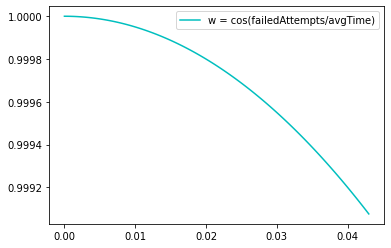

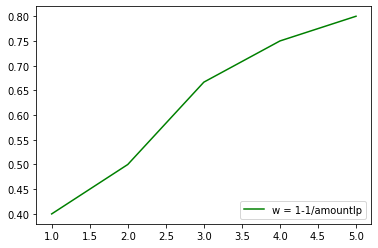

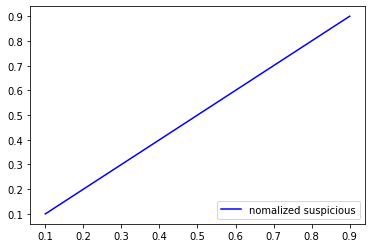

In [194]:
# plotting weigth assign to bot according to attemps average time and failed attempts number 
max_ratio = df_series["failedAttempts"].max()/df_series["avgTime"].min()
min_ratio = df_series["failedAttempts"].min()/df_series["avgTime"].max()
x = np.linspace(min_ratio,max_ratio,100)
y = np.cos(x)
plt.plot(x,y,'c',label="w = cos(failedAttempts/avgTime)")
plt.title = "Weight for BOT"
plt.legend(loc='upper right')
plt.show()
# plotting weigth releated to ip used within a serie
max_ip_number = df_series["ipAmount"].max()
min_ip_number = df_series["ipAmount"].min()
y =[]
x = range(min_ip_number,max_ip_number+1)
for amount in x:
    y.append(1 - (1/amount if amount > 1 else 0.6))
plt.title = "Weight for ipAmount"
plt.plot(x,y,'g',label="w = 1-1/amountIp")
plt.legend(loc='lower right')
plt.show()
y = []
for i in np.arange(0.1,1.0,0.1):
    y.append(graham([i]))
x = np.arange(0.1,1.0,0.1)
plt.title = "Graham function"
plt.plot(x,y,'b',label="nomalized suspicious")
plt.legend(loc='lower right')
plt.show()

In [212]:
df_series['suspicious'] = df_series.apply(lambda row : suspicious(row), axis=1)

w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.99
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4

w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.5
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85

w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7

w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.5
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7

w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.5
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.5
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.5
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85

w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.55
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85

w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.9
w 0.55
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.5
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85

w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.7
w 0.35
w 0.5
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85

w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85

w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.55
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.5
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.5
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85

w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85

w 0.4
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85

w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.5
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85

w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85

w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.5
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.7
w 0.55
w 0.5
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85

w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.9
w 0.35
w 0.5
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4

w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85

w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25

w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.5
w 0.85
w 0.9
w 0.25
w 0.5
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1

w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.9
w 0.55
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.35
w 0.5
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.9
w 0.55
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85

w 0.1
w 0.35
w 0.5
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.5
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55

w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.5
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85

w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.9
w 0.35
w 0.5
w 0.85
w 0.9
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9

w 0.7
w 0.35
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.7
w 0.55
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.5
w 0.55
w 0.4
w 0.85
w 0.9
w 0.25
w 0.5
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25

w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.35
w 0.5
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.55
w 0.5
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.55
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.1
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.7
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4

w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.5
w 0.25
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.7
w 0.35
w 0.4
w 0.85
w 0.1
w 0.25
w 0.4
w 0.85
w 0.9
w 0.25
w 0.4
w 0.85
w 0.7


In [213]:
df_series.describe()

userId        avgTime  failedAttempts    hasSuccess  \
count  12963.000000   12963.000000    12963.000000  12963.000000   
mean   17979.547944   51904.830407        3.886292      0.468179   
std    10759.405175   38773.357697        2.889793      0.499006   
min       18.000000    1000.000000        2.000000      0.000000   
25%     6271.000000   22500.000000        2.000000      0.000000   
50%    19984.000000   40000.000000        3.000000      0.000000   
75%    27595.000000   71071.428571        4.000000      1.000000   
max    33949.000000  282500.000000       43.000000      1.000000   

        workingTime           day      ipAmount    suspicious  
count  12963.000000  12963.000000  12963.000000  12963.000000  
mean       0.803981      3.174651      1.021909      0.484685  
std        0.396999      1.702503      0.153088      0.315473  
min        0.000000      1.000000      1.000000      0.122744  
25%        1.000000      2.000000      1.000000      0.122744  
50%        1.000000      3.000000      1.000000      0.557377  
75%        1.000000      5.000000      1.000000      0.746082  
max        1.000000      7.000000      5.000000      0.998624

In [214]:
df_series[df_series["suspicious"] == df_series["suspicious"].max()]

userId  avgTime  failedAttempts  hasSuccess application  workingTime  \
35404   31002   4000.0              11           0         ERM            0   

       day  ipAmount  suspicious  
35404    6         1    0.998624

In [37]:
#df_series[df_series["failedAttempts"] == df_series["failedAttempts"].max()]

In [217]:
df_series[(df_series["avgTime"] < 5000) & (df_series["failedAttempts"] > 3)].sort_values(by=['suspicious'])

userId      avgTime  failedAttempts  hasSuccess application  \
10307    6229  1000.000000               4           0         ERM   
24449   22215  3500.000000               5           0         ERM   
30192   26694  2666.666667               4           0         HRW   
34699   30570  4000.000000               4           0         ERM   
35404   31002  4000.000000              11           0         ERM   

       workingTime  day  ipAmount  suspicious  
10307            1    2         1    0.980892  
24449            1    3         1    0.980892  
30192            1    3         1    0.980892  
34699            1    5         1    0.980892  
35404            0    6         1    0.998624

In [39]:
byApp = df_series[df_series["suspicious"] > 0.5].groupby(by=["application"])
tmp = byApp.userId.count()
tmp

application
ERM    5769
HRW       7
Name: userId, dtype: int64

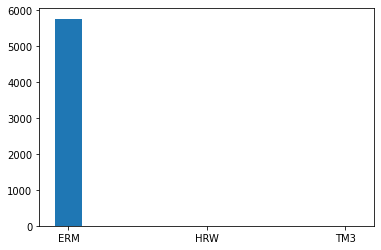

In [40]:
x = [k for k in tmp.keys()]
x.append("TM3")
y = [tmp[k] for k in tmp.keys()]
y.append(0)

plt.bar(x,y,width=0.2)
plt.title = "Most suspicious applcation"
plt.show()

From the graph we can say that in optics of cyber attacks it is not meaningful to be based on the working time  and day of the week, as we have suspicious series regardless of the parameters related to these factors.

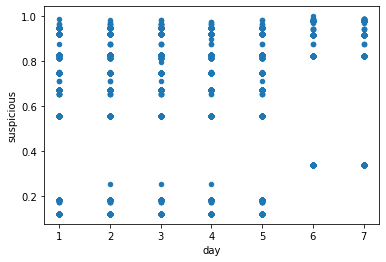

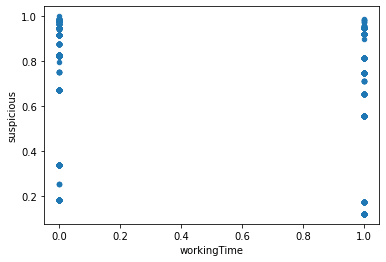

In [215]:
df_series.plot(x = 'day', y = 'suspicious', kind = 'scatter')
plt.show()
df_series.plot(x = 'workingTime', y = 'suspicious', kind = 'scatter')
plt.show()

Comparing amount of ip and failed attempts we can notice that with a single ip the number of failed attempts is bigger.
_It may indicate a presence of a target of an attack_. 
**Possible scenario**: attackers know the username of an employee and so they try guessing the password. 

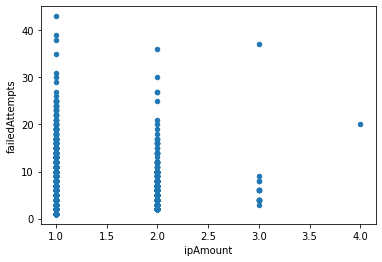

In [42]:
df_series.plot(x = 'ipAmount', y = 'failedAttempts', kind = 'scatter')
plt.show()

When the series of login attempts is closed with a successful attempts, the number of failed attempts is approximately the half respect to the complementary case.

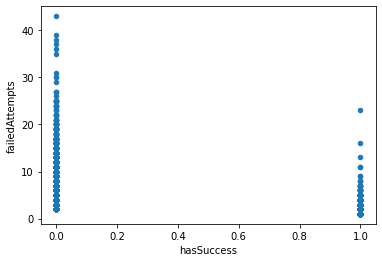

In [43]:
df_series.plot(x = 'hasSuccess', y = 'failedAttempts', kind = 'scatter')
plt.show()

The average time between login attempts and number of failures are inversely proportional. Indeed _suspicious_ assumes values close to one when the average time gets shorter (the number of failed attempts gets larger).

10307      1
30192      2
2701       2
24449      3
24450      3
        ... 
13233    256
9167     257
29254    260
9649     261
29059    282
Name: avgTime, Length: 12963, dtype: int64

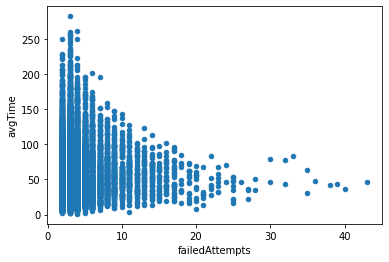

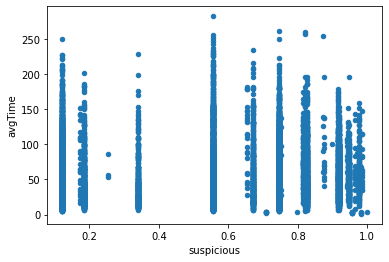

In [216]:
df_tmp = df_series.copy()
df_tmp["avgTime"] = df_tmp["avgTime"].apply(lambda x: int(x/1000))
df_tmp.plot(y="avgTime",x="failedAttempts",kind="scatter")
df_tmp.plot(y="avgTime",x="suspicious",kind="scatter")
df_tmp["avgTime"].sort_values()

## IP series analysis

In [45]:
failedAttemptsSeriesIP = dict()
df_logins.sort_values(by=["ip","date"],ascending=(True, True),inplace=True)
df_groupBy_ip = df_logins.groupby(by=["ip"])
df_groupBy_ip
ips = np.unique(df_logins["ip"])
findSeries(subjects=ips,df_groupBySubject=df_groupBy_ip,storage=failedAttemptsSeriesIP,userMode=False)
#failedAttemptsSeriesIP

In [53]:
#computing metics
seriesEvalIndex = computeMetrics(failedAttemptsSeriesIP)
df_ip_series = pd.DataFrame(seriesEvalIndex,columns=["ip","avgTime","failedAttempts","hasSuccess","application","workingTime","day","userAmount"])
#delete series with just one log err and average mean equal to 0
df_ip_series.drop(df_ip_series[ df_ip_series["avgTime"] == 0 ].index,inplace=True)
df_ip_series['suspicious'] = df_ip_series.apply(lambda row : suspicious(row), axis=1)
df_ip_series[df_ip_series["suspicious"] == df_ip_series["suspicious"].max()]

ip  avgTime  failedAttempts  hasSuccess application  workingTime  \
5761  ip_126     4000               5           0         ERM            1   

      day  userAmount  suspicious  
5761    1           4    0.999999

In [54]:
df_ip_series[df_ip_series["userAmount"] == df_ip_series["userAmount"].max()]

ip  avgTime  failedAttempts  hasSuccess application  workingTime  \
39331  ip_855    60789              20           0         ERM            1   

       day  userAmount  suspicious  
39331    1          13    0.987013

### Users dataframe construction

In [48]:
byUserId = df_series.groupby(by=["userId"])
meanSuspicous = byUserId["suspicious"].mean()
meanSuspicous

userId
18       0.666667
21       0.052632
24       0.092369
33       0.052632
35       0.024068
           ...   
33899    0.052632
33920    0.500000
33928    0.035714
33934    0.446809
33949    0.634921
Name: suspicious, Length: 8718, dtype: float64

In [49]:
seriesNumber = byUserId["suspicious"].count()
seriesNumber

userId
18       1
21       1
24       6
33       1
35       5
        ..
33899    1
33920    2
33928    1
33934    1
33949    3
Name: suspicious, Length: 8718, dtype: int64

In [50]:
users = []
for key, value in byUserId:
    users.append(key)

df_users = pd.DataFrame(columns=["userId","isSuspicious"])

df_users["userId"] = users
df_users["isSuspicious"] = meanSuspicous.values
df_users["seriesNumber"] = seriesNumber.values
df_users.sample(SAMPLE)

userId  isSuspicious  seriesNumber
2788   11591      0.666667             1
4053   17936      0.333333             2
992     2897      0.005025             1
8179   32187      0.028828             2
3129   12985      0.028828             2
4528   19878      0.335008             3
6065   25119      0.333333             2
7408   29359      0.666667             1
2798   11639      0.020894             3
2026    5777      0.554622             4

In [51]:
df_users[df_users["isSuspicious"] == df_users["isSuspicious"].max()]

userId  isSuspicious  seriesNumber
4719   20392      0.972093             1
4831   20686      0.972093             1
4849   20749      0.972093             1

#### Plotting

suspicious --> range [0,1]
- 0 se non è un login sospetto
- 1 se è certo al 100% che il login è sospetto

Pesi:
- XXXXXX 1/avgBtw2loginErr                       --> tempo fra login errati minore di soglia
- XXXXXX 1/f(day & isWorkingTime) 
- XXXXXX 1 - (1/numeroIpUsati)                         --> login di errore eseguiti da ip diversi
- se ha login con successo --> vedo quanti tentativi ha fatto: 
    - se il numero di tentativi è <= 3 e il tempo è > del tempoBot --> assegno valore grande (0.1)
    - se il # tentativi <= 3 e il tempo è < del tempoBot --> assegno valore piccolo (0.7) (password corretta)
    - se il # tentativi > 3:
        - tempo > tempoBot --> 0.2 (utente stupido O collega che cerca di entrare)
        - tempo <= tempoBot --> 1.0 (bot entrato)
- altrimenti --> guardo il numero di tentativi:
    - <= 3 & tempo > tempoBot --> 0.3 (user ha dimenticato password)
    - <= 3 & tempo <= tempoBot --> 0.9 (bot cerca di entrare ma smette la ricerca presto)
    - > 3 & tempo > tempoBot --> 0.4 (user ha dimenticato password e cerca di entrare troppe volte)
    - > 3 & tempo < tempoBot --> 1.0 (bot cerca di entrare tante volte)


**suspicious = w1 * w2 * ... * wn**


<br>
<br>


Step process:
- valutare range variabiltà pesi
- analisi per group by IP
- mettere costanti per i pesi
- commentare parti restanti
